# Census Income

## Project Description

## Adeeb Naiyer

## Batch 2402

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1.	A single cell estimate of the population 16+ for each state.
   
2.	Controls for Hispanic Origin by age and sex.
   
3.	Controls by Race, age and sex.
   
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

## Dataset Link-

•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Census%20Income/Census%20Income.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import zipfile
warnings.filterwarnings('ignore')

In [2]:
# Retrive the dataset using the raw address
url = "https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv"
df = pd.read_csv(url)

# 1. EDA

In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
# Checking the dimensions and the columns

df.shape

(32560, 15)

In [6]:
df.columns.to_list()

['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country',
 'Income']

The dataset contains 32560 rows and 15 colummnms

target variable: income

feature columns: 14

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Observations: 

There are two types of datatypes: int and float

No null values present

## Missing values

In [8]:

# checking the null values
miss_val = df.isnull().sum().to_frame("Null values")

# Calculate the % of the null values
miss_val["% of missing"] = round(miss_val['Null values'] / len(df) * 100,2)

miss_val

,Null values,% of missing
Age,0,0.0
Workclass,0,0.0
Fnlwgt,0,0.0
Education,0,0.0
Education_num,0,0.0
Marital_status,0,0.0
Occupation,0,0.0
Relationship,0,0.0
Race,0,0.0
Sex,0,0.0


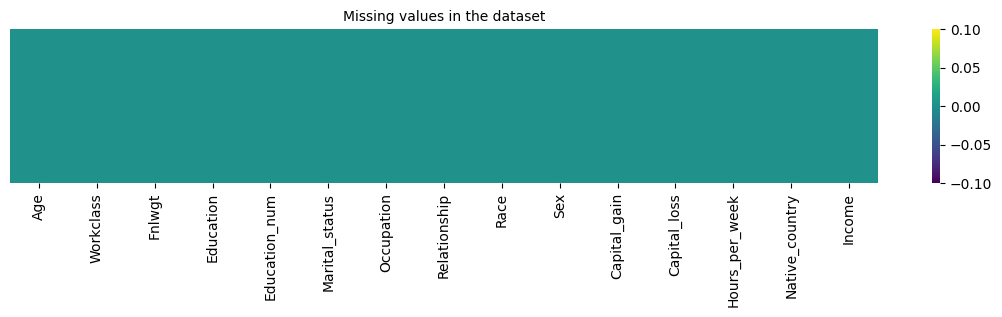

In [9]:
# Let's visualize it using heatmap for dataset
plt.figure(figsize=(14,2))
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')
plt.title('Missing values in the dataset', fontsize=10);

# Observations:

No missing values present

## Feature analysis

In [10]:
# Reviewing the number of unique values in each feature and the target
info_df = df.nunique().to_frame('No. of Unique values')
info_df['type'] = df.dtypes.values

info_df

,No. of Unique values,type
Age,73,int64
Workclass,9,object
Fnlwgt,21647,int64
Education,16,object
Education_num,16,int64
Marital_status,7,object
Occupation,15,object
Relationship,6,object
Race,5,object
Sex,2,object


categorical variables: Workclass(9), Education(16), Marital_status(7), Occupation(15), Relationship(6), Race(5), Sex(2), Native_country(42), Income(2)

The numerical columns: Age, Fnlwgt, Education_num, Capital_gain, Capital_loss, and Hours_per_week.

### Target unnique values

In [11]:
# Checking the target variable
df['Income'].value_counts().to_frame()

,count
Income,
<=50K,24719
>50K,7841


The dataset is imbalanced!!!

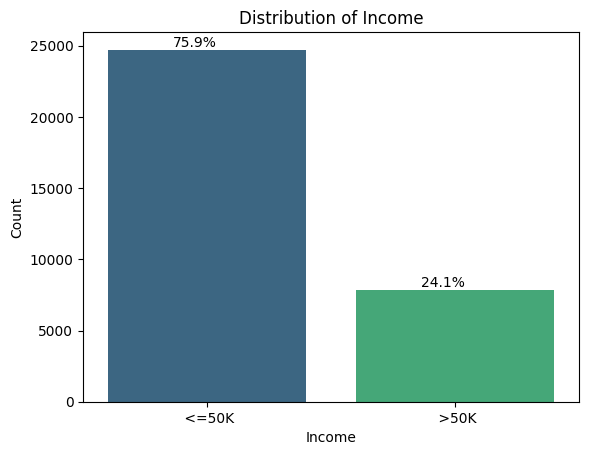

In [12]:
# Calculate the percentage for each category
total = len(df)
ax = sns.countplot(data=df, x='Income', palette='viridis')

# Annotate each bar with the percentage
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

We have to use oversampling techniques later to balance the dataset

### Separating numerical and categorical columns

In [13]:
# Separating Numerical and Categorical columns
cat_col = []
num_col = []

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        cat_col.append(i)
    else:
        num_col.append(i)

#  Numerical and Categorical columns
print(f"Categorical Columns:\n {cat_col}\n")
print(f"Numerical Columns:\n {num_col}\n")

Categorical Columns:
 ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']

Numerical Columns:
 ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']



#### categorical features

In [14]:
# Checking the value counts of the categorical independent variables
for i, col in enumerate(cat_col[1:]):
    print(f"{i+1}.{col}:\n{df[col].value_counts()}\n")

1.Education:
Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64

2.Marital_status:
Marital_status
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64

3.Occupation:
Occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Fa

#### numerical features

In [15]:
# Checking the value counts of the numerical independent variables
for i, col in enumerate(num_col):
    print(f"{i+1}.{col}:\n{df[col].value_counts()}\n")

1.Age:
Age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64

2.Fnlwgt:
Fnlwgt
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: count, Length: 21647, dtype: int64

3.Education_num:
Education_num
9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: count, dtype: int64

4.Capital_gain:
Capital_gain
0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: count, Length: 119, dtype: int64

5.Capital_loss:
Capital_loss
0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1

## Statistics summary

In [16]:
stats = df.describe()

stats

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [17]:
# Contrast the mean with the 50th percentile
(stats.loc['mean',:] - stats.loc['50%',:]).sort_values(ascending=False)

Fnlwgt            11418.814373
Capital_gain       1077.615172
Capital_loss         87.306511
Age                   1.581634
Hours_per_week        0.437469
Education_num         0.080590
dtype: float64

#### Obervation:

There are no negative or invalid/null values

The target column is categorical

the mean value is larger than the median in Fnlwgt, Capital_gain, and Capital_loss: Right skewed


In [18]:
# Contrast the maximum value in each colum with 2 times the std plus the mean 
(stats.loc['max',:] - (stats.loc['mean',:] + 2 * stats.loc['std',:] ) ).sort_values(ascending=False)

Fnlwgt            1.083824e+06
Capital_gain      8.415058e+04
Capital_loss      3.462761e+03
Hours_per_week    3.386729e+01
Age               2.413708e+01
Education_num     7.739924e-01
dtype: float64

There could be outlier in Fnlwgt, Capital_gain, and Capital_loss,

The featueres are not on the same scale

In [19]:
# Look at the non numeric columns
df.describe(exclude=[np.number])

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
count,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27815,21789,29169,24719


## Duplicates

In [20]:
# Searching for duplicated values
print(f"There are {df.duplicated().sum()} duplicates in the dataset.")

There are 24 duplicates in the dataset.


In [21]:
# Drop duplicated rows 
df.drop_duplicates(inplace=True)

# checking the new dimension of the dataset
print(f"New dataset dimension: {df.shape}")
print(f"Now, There are {df.duplicated().sum()} duplicates in the dataset.")

New dataset dimension: (32536, 15)
Now, There are 0 duplicates in the dataset.


## Preprocessing

In [22]:
df['Education'].value_counts()

Education
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: count, dtype: int64

In [23]:
# Define the mapping for combining categories
category_mapping = {
    'Assoc-voc': 'Associate',
    'Assoc-acdm': 'Associate',
    '11th': 'Below High School',
    '10th': 'Below High School',
    '7th-8th': 'Below High School',
    '9th': 'Below High School',
    '12th': 'Below High School',
    '5th-6th': 'Below High School',
    '1st-4th': 'Below High School',
    'Preschool': 'Below High School'
}
col = 'Education'

# Eliminating extra spaces 
df[col] = df[col].str.strip()

# In column Occupation_bk will reserve the original values
df['Education_bk'] = df[col]

# Assing the combined categories
df[col] = df[col].replace(category_mapping)
df[col].unique()

array(['Bachelors', 'HS-grad', 'Below High School', 'Masters',
       'Some-college', 'Associate', 'Doctorate', 'Prof-school'],
      dtype=object)

## Setting the order in the categories

In [24]:
# Define the order for the category Education with original values.
col = 'Education_bk'
order_cat =  ['Doctorate', 'Masters', 'Bachelors', 'Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college','HS-grad', 
              '11th', '10th', '7th-8th', '9th', '12th', '5th-6th', '1st-4th', 'Preschool']
df[col] = pd.Categorical(df[col], categories=order_cat, ordered=True)

# Confirming setting the category
print(f"Categories for {col}:")
display(df[col].dtype)

Categories for Education_bk:


CategoricalDtype(categories=['Doctorate', 'Masters', 'Bachelors', 'Assoc-voc',
                  'Assoc-acdm', 'Prof-school', 'Some-college', 'HS-grad',
                  '11th', '10th', '7th-8th', '9th', '12th', '5th-6th',
                  '1st-4th', 'Preschool'],
, ordered=True)

In [25]:
# Define the order for the categorical features.

categories_order = {}

for i,col in enumerate(cat_col[:-1]):
    print(f"{i+1}.{col}:")
    
    # Eliminating extra spaces 
    df[col] = df[col].str.strip()
    # Defining ? == Unknown
    df[col] = df[col].str.replace('?', 'Unknown') 

    # Transform to ordered categories
    if col == 'Education':
        order_cat = ['Doctorate', 'Masters', 'Bachelors', 'Associate', 'Prof-school',
                     'Some-college','HS-grad', 'Below High School']
    else:   
        order_cat = df[col].value_counts().index.to_list()
    
    categories_order[col] = order_cat
    df[col] = pd.Categorical(df[col], categories=order_cat, ordered=True)

# Confirming setting the category
    display(df[col].dtype)

1.Workclass:


CategoricalDtype(categories=['Private', 'Self-emp-not-inc', 'Local-gov', 'Unknown',
                  'State-gov', 'Self-emp-inc', 'Federal-gov', 'Without-pay',
                  'Never-worked'],
, ordered=True)

2.Education:


CategoricalDtype(categories=['Doctorate', 'Masters', 'Bachelors', 'Associate',
                  'Prof-school', 'Some-college', 'HS-grad',
                  'Below High School'],
, ordered=True)

3.Marital_status:


CategoricalDtype(categories=['Married-civ-spouse', 'Never-married', 'Divorced',
                  'Separated', 'Widowed', 'Married-spouse-absent',
                  'Married-AF-spouse'],
, ordered=True)

4.Occupation:


CategoricalDtype(categories=['Prof-specialty', 'Craft-repair', 'Exec-managerial',
                  'Adm-clerical', 'Sales', 'Other-service',
                  'Machine-op-inspct', 'Unknown', 'Transport-moving',
                  'Handlers-cleaners', 'Farming-fishing', 'Tech-support',
                  'Protective-serv', 'Priv-house-serv', 'Armed-Forces'],
, ordered=True)

5.Relationship:


CategoricalDtype(categories=['Husband', 'Not-in-family', 'Own-child', 'Unmarried', 'Wife',
                  'Other-relative'],
, ordered=True)

6.Race:


CategoricalDtype(categories=['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
                  'Other'],
, ordered=True)

7.Sex:


CategoricalDtype(categories=['Male', 'Female'], ordered=True)

8.Native_country:


CategoricalDtype(categories=['United-States', 'Mexico', 'Unknown', 'Philippines',
                  'Germany', 'Canada', 'Puerto-Rico', 'El-Salvador', 'India',
                  'Cuba', 'England', 'Jamaica', 'South', 'China', 'Italy',
                  'Dominican-Republic', 'Vietnam', 'Japan', 'Guatemala',
                  'Poland', 'Columbia', 'Taiwan', 'Haiti', 'Iran', 'Portugal',
                  'Nicaragua', 'Peru', 'France', 'Greece', 'Ecuador',
                  'Ireland', 'Hong', 'Cambodia', 'Trinadad&Tobago', 'Laos',
                  'Thailand', 'Yugoslavia', 'Outlying-US(Guam-USVI-etc)',
                  'Honduras', 'Hungary', 'Scotland', 'Holand-Netherlands'],
, ordered=True)

## Data Visualisation

### Univariate analysis

In [26]:
# Distribution of Income
df['Income'].value_counts().to_frame()

,count
Income,
<=50K,24697
>50K,7839


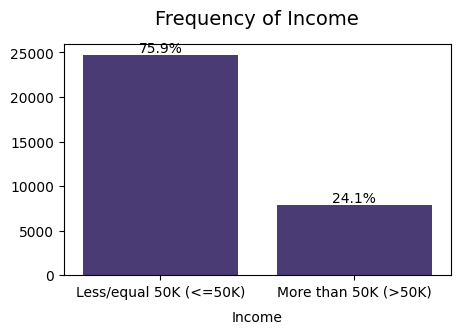

In [27]:
# Set the custom palette
sns.set_palette('viridis')

# Visualize the frequency of Income
col = 'Income'
plt.figure(figsize=(5, 3))
ax = sns.countplot(x=col, data=df)

# Calculate the total number of observations
total = len(df)

# Annotate each bar with the percentage
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = height
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.xlabel(col, size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.xticks([0, 1], ['Less/equal 50K (<=50K)', 'More than 50K (>50K)'], size=10)
plt.title(f"Frequency of {col}", size=14, y=1.05)
plt.show()

75.9% are > 50k and 24.1% are < 50k

## Categorical column

In [28]:
# List of categorical columns in the dataset
for i,col in enumerate(cat_col[:-1]):
    print(f"{i+1}.{col}")

1.Workclass
2.Education
3.Marital_status
4.Occupation
5.Relationship
6.Race
7.Sex
8.Native_country


In [29]:
def show_percentage(ax, total):
    for p in ax.patches:
        height = p.get_height()
        percentage = f'{100 * height / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = height
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

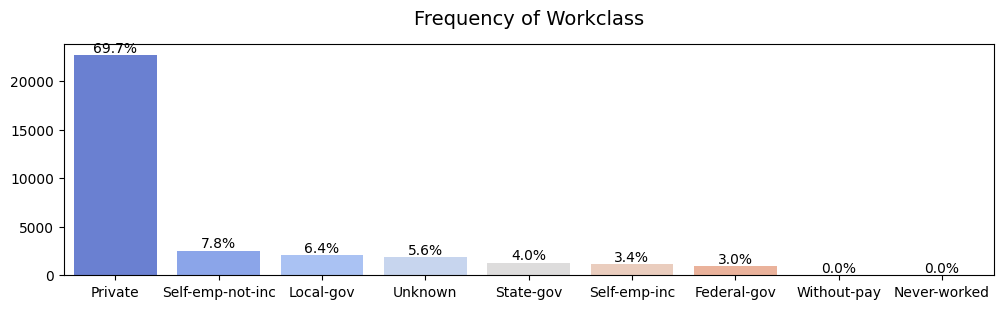

In [30]:
# Visualize the frequency of Workclass(1)
col = 'Workclass'
plt.figure(figsize=(12, 3))
df_counts = df[col].value_counts()
ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='coolwarm', order=df_counts.index.categories.to_list())
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

In [31]:
print(df.columns)


Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income', 'Education_bk'],
      dtype='object')


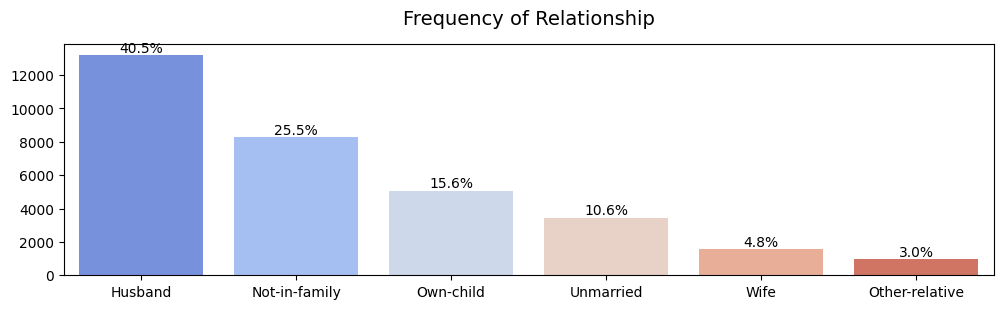

In [32]:
# Visualize the frequency of Relationship(5)
col = 'Relationship'
plt.figure(figsize=(12, 3))
ax = sns.countplot(x=col, data=df, palette='coolwarm')
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)
plt.show()

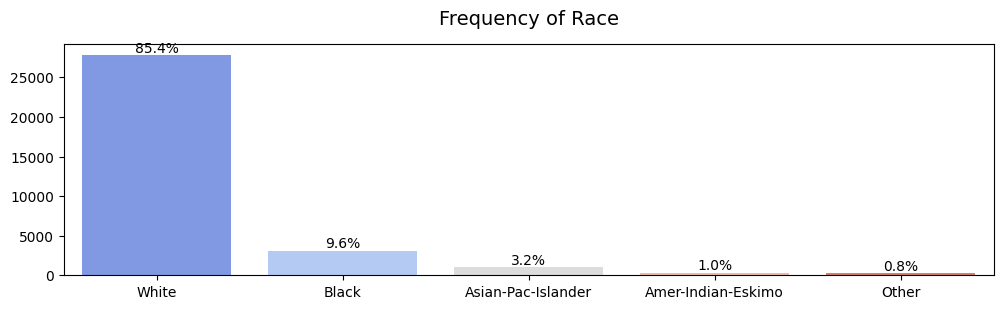

In [33]:
# Visualize the frequency of Race(6)
col = 'Race'
plt.figure(figsize=(12, 3))
ax = sns.countplot(x=col, data=df, palette='coolwarm')
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)
plt.show()

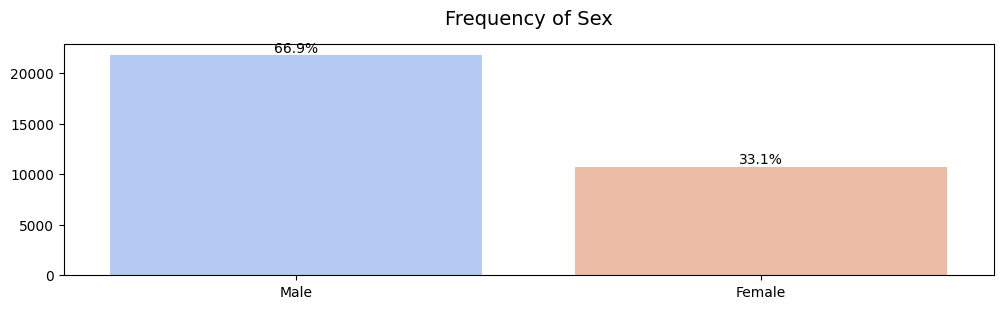

In [34]:
# Visualize the frequency of Sex(7)
col = 'Sex'
plt.figure(figsize=(12, 3))
ax = sns.countplot(x=col, data=df, palette='coolwarm')
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)
plt.show()

## Numerical columns

In [35]:
# List of numerical columns
for i,col in enumerate(num_col):
    print(f"{i+1}. {col}")

1. Age
2. Fnlwgt
3. Education_num
4. Capital_gain
5. Capital_loss
6. Hours_per_week


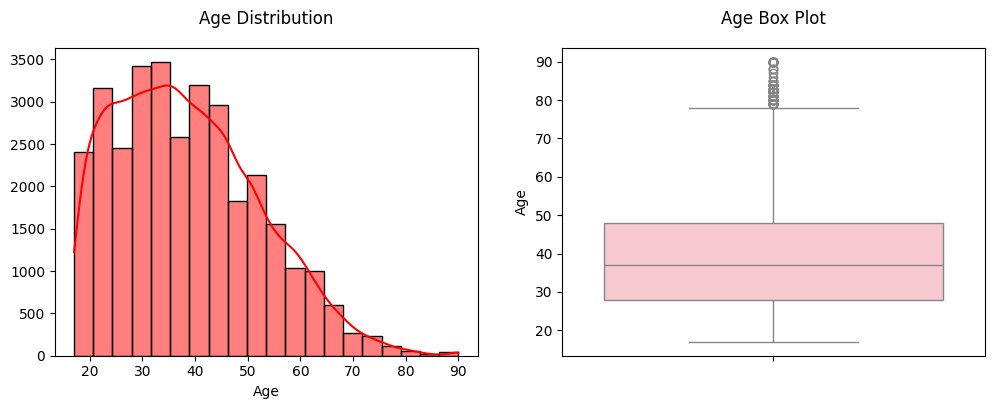

Skewness of Age : 0.557657407634356


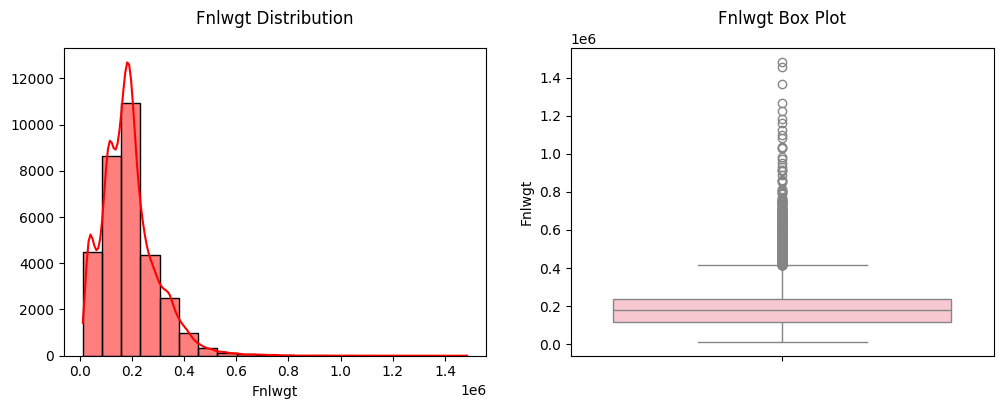

Skewness of Fnlwgt : 1.447695071063747


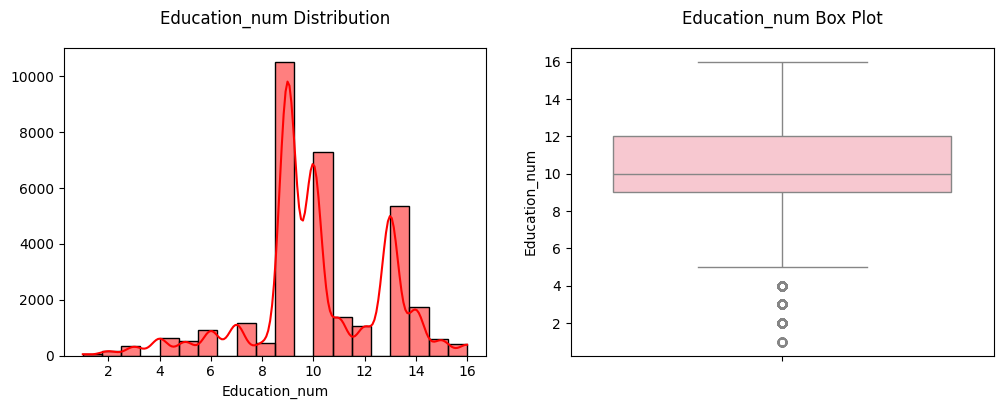

Skewness of Education_num : -0.30945415628220213


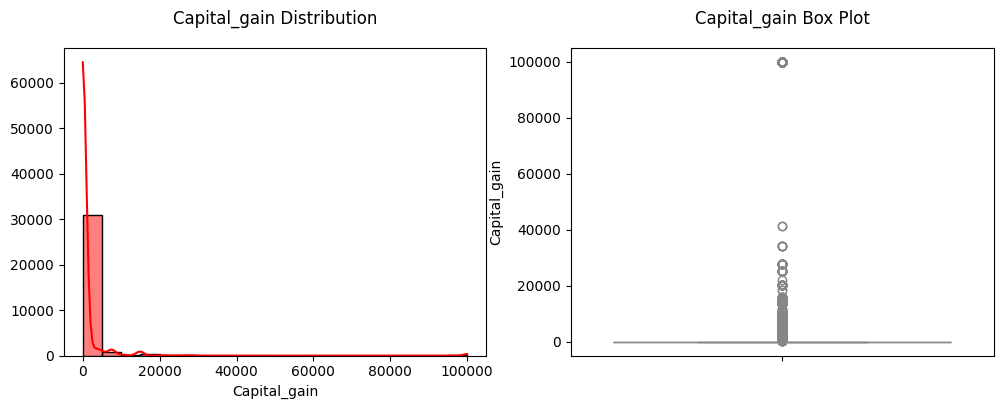

Skewness of Capital_gain : 11.949244909052934


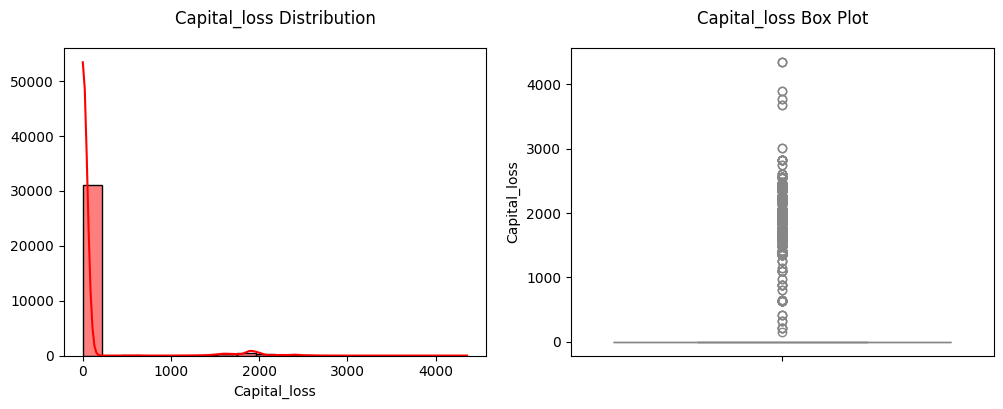

Skewness of Capital_loss : 4.592622126751731


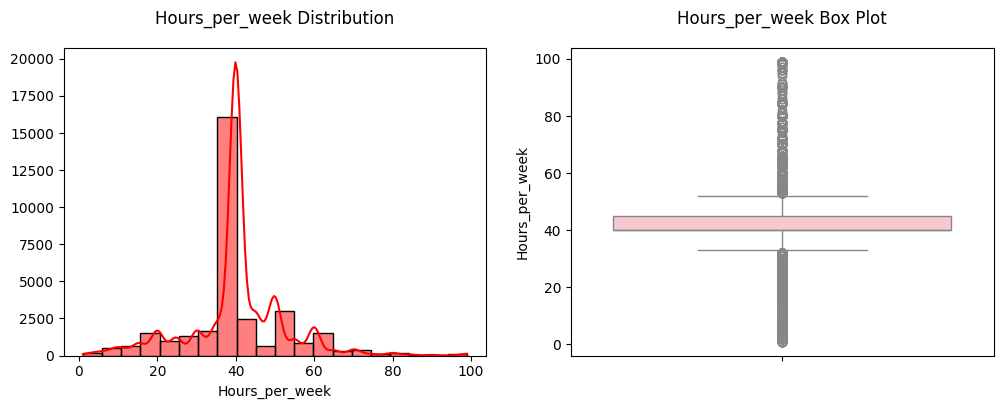

Skewness of Hours_per_week : 0.2287520890962958


In [36]:
for i in num_col:
        
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(df[i], kde=True , bins=20, ax=axes[0], color='red')
    sns.boxplot(df[i], ax=axes[1], color='pink')

    axes[0].set_title(f'{i} Distribution', size=12, y=1.05)
    axes[0].set_ylabel('', size=10, labelpad=8)

    axes[1].set_title(f'{i} Box Plot', size=12, y=1.05)

    plt.show()

# Show the skewness of Age
    print(f"Skewness of {i} : {df[i].skew()}")

## Bivariate analysis

#### Target and numerical columns

In [37]:
# List of numerical columns
for i,col in enumerate(num_col):
    print(f"{i+1}. {col}")

1. Age
2. Fnlwgt
3. Education_num
4. Capital_gain
5. Capital_loss
6. Hours_per_week


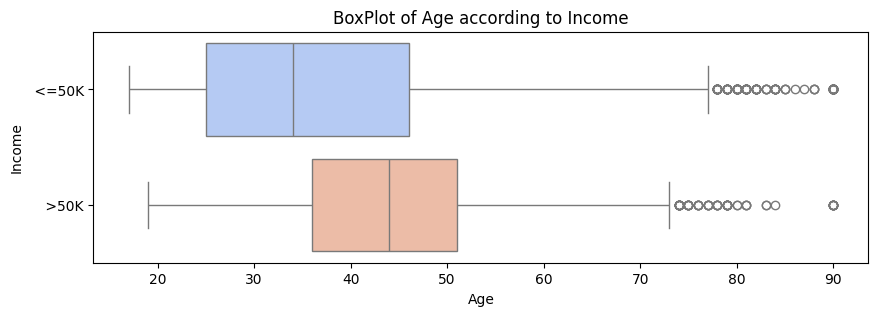

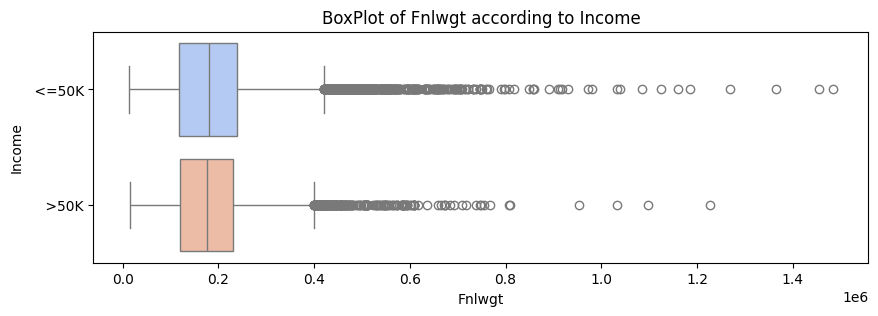

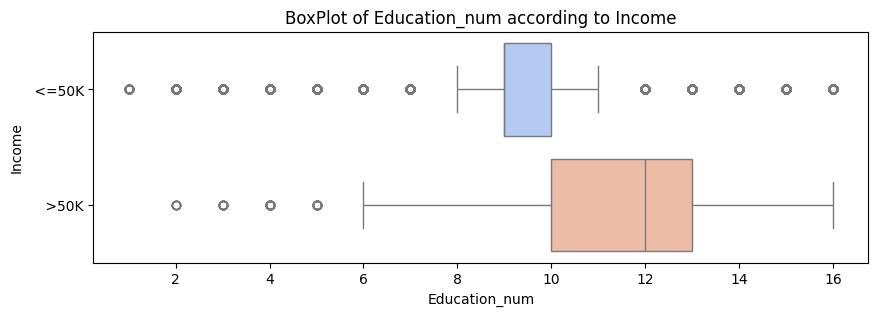

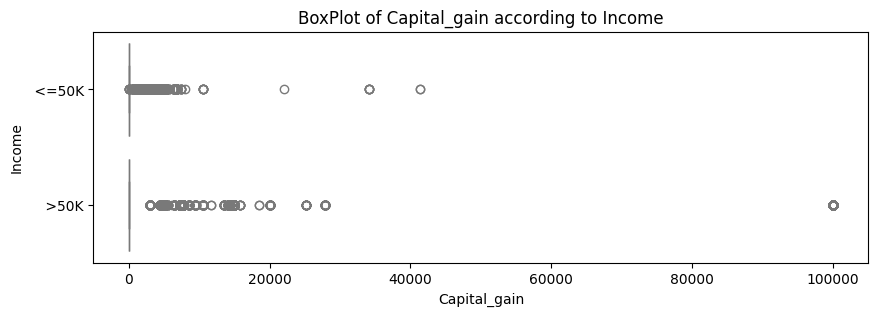

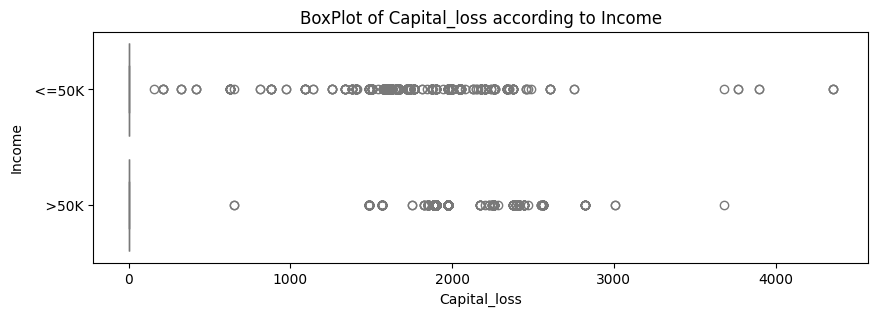

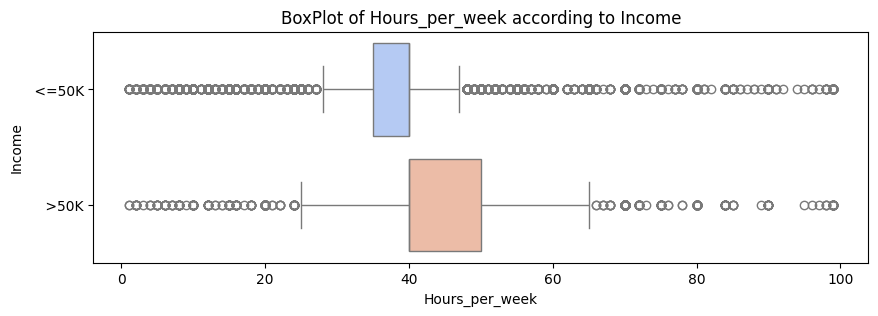

In [38]:
for col  in num_col:
        
    plt.figure(figsize=(10, 3))
    sns.boxplot(data=df[[col,'Income']], x=col, y='Income', palette='coolwarm')
    plt.title(f"BoxPlot of {col} according to Income")
    
    plt.show()

Those who work 40 hours per week or more tend to have an income >50K. The majority of those who have an income <=50K tend to work less than 40 hours per week.

#### Target and categorical columns

In [39]:

def show_percentage(ax, total):
    ''' Shows the representative percentage in each bar in a countplot.'''
    for p in ax.patches:
        percentage = f"{100 * p.get_height()/total:.1f} %"
        x = p.get_x() + p.get_width() / 2 - 0.02
        y = p.get_height()
        ax.annotate(percentage, (x, y), fontsize=10, ha='center')

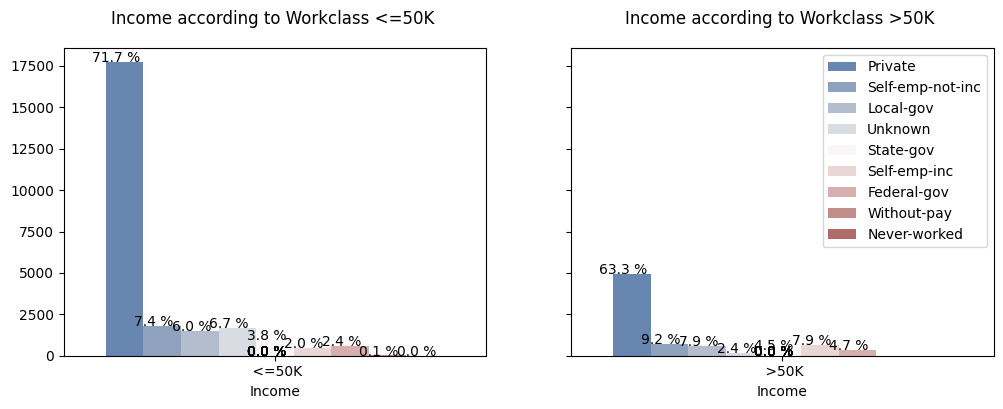

In [40]:
# Compare Workclass vs Income
col = 'Workclass' #1

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

sns.countplot(x='Income', hue=col, data=df_less_50K, palette='vlag', ax=axes[0])
show_percentage(axes[0], len(df_less_50K)) 
axes[0].set_title(f"Income according to {col} <=50K ", size=12, y=1.05);
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].legend().remove()

sns.countplot(x='Income', hue=col, data=df_more_50K, palette='vlag', ax=axes[1])
show_percentage(axes[1], len(df_more_50K)) 
axes[1].set_title(f"Income according to {col} >50K ", size=12, y=1.05);
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].legend(loc='upper right')

plt.show()

The majority of individuals earning more than 50K are in the private work class, accounting for 63.3%. It's also noteworthy that those with lower incomes predominantly belong to the private work class as well, making up 71.7%.

Hence, we can deduce that most observations, irrespective of income level, are from the private work class.

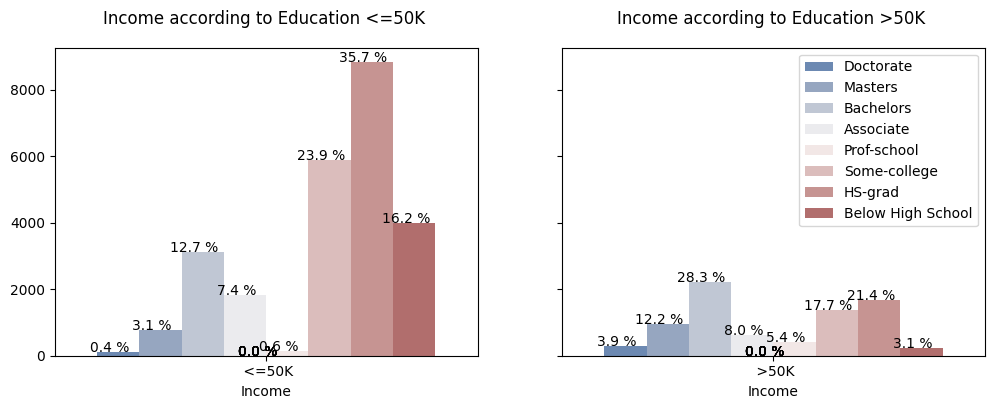

In [41]:
# Compare Education vs Income
col = 'Education' #2

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

sns.countplot(x='Income', hue=col, data=df_less_50K, palette='vlag', ax=axes[0])
show_percentage(axes[0], len(df_less_50K)) 
axes[0].set_title(f"Income according to {col} <=50K ", size=12, y=1.05);
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].legend().remove()

sns.countplot(x='Income', hue=col, data=df_more_50K, palette='vlag', ax=axes[1])
show_percentage(axes[1], len(df_more_50K)) 
axes[1].set_title(f"Income according to {col} >50K ", size=12, y=1.05);
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].legend(loc='upper right')

plt.show()

The Education feature appears to influence income range. Specifically, 28.3% of those earning more than 50K hold a Bachelor's degree. In contrast, among those earning 50K or less, 35.7% are high school graduates, 23.9% have attended some college, and 16.2% have not finished high school.

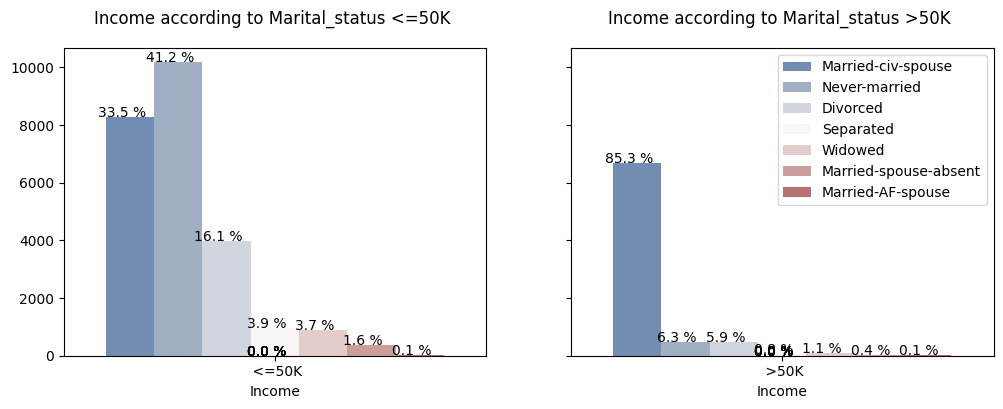

In [42]:
# Compare Marital_status vs Income
col = 'Marital_status' #3

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

sns.countplot(x='Income', hue=col, data=df_less_50K, palette='vlag', ax=axes[0])
show_percentage(axes[0], len(df_less_50K)) 
axes[0].set_title(f"Income according to {col} <=50K ", size=12, y=1.05);
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].legend().remove()

sns.countplot(x='Income', hue=col, data=df_more_50K, palette='vlag', ax=axes[1])
show_percentage(axes[1], len(df_more_50K)) 
axes[1].set_title(f"Income according to {col} >50K ", size=12, y=1.05);
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].legend(loc='upper right')

plt.show()

In [43]:
# Function to format % labels and specify the position for the 'Other' category
def format_label(pct):
    if pct < 5:  
        return f"{pct:.1f}%"
    return f"\n  {pct:.1f}%"

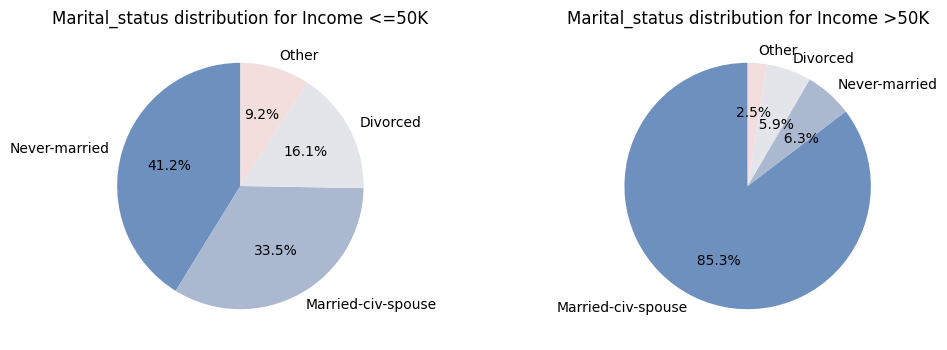

In [44]:
# Distribution of Marital Status according to Income
col = 'Marital_status' #3

sns.set_palette('vlag')

# Filter the data for the two income categories
df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

# Calculate the counts for each 'Marital_status' category in each income group
counts_less_50K = df_less_50K[col].value_counts()
counts_more_50K = df_more_50K[col].value_counts()

# Create subplots for the pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Select 3 top categories for 'Income <=50K'
top_categories = counts_less_50K.nlargest(3)
labels = top_categories.index.to_list()
labels.append('Other')
data = top_categories.to_list()
data.append(counts_less_50K.sum() - top_categories.sum())

# Plot pie chart for 'Income <=50K'
axes[0].pie(data, labels=labels, autopct='%1.1f%%', startangle=90)
axes[0].set_title(f"{col} distribution for Income <=50K")

# Select 3 top categories for 'Income >50K'
top_categories = counts_more_50K.nlargest(3)
labels = top_categories.index.to_list()
labels.append('Other')
data = top_categories.to_list()
data.append(counts_more_50K.sum() - top_categories.sum())

# Plot pie chart for 'Income >50K'
axes[1].pie(data, labels=labels, autopct=format_label, startangle=90)
axes[1].set_title(f"{col} distribution for Income >50K")

plt.show()

Most individuals earning over $50,000 are predominantly married to civilian spouses, comprising 85.3%, whereas other marital statuses represent 6.3% or less of this group.

Conversely, those earning $50,000 or less are primarily composed of individuals who have never been married (41.2%), followed by those married to civilian spouses (33.5%), divorced individuals (16.1%), with the remainder (9.2%) falling into other marital statuses.

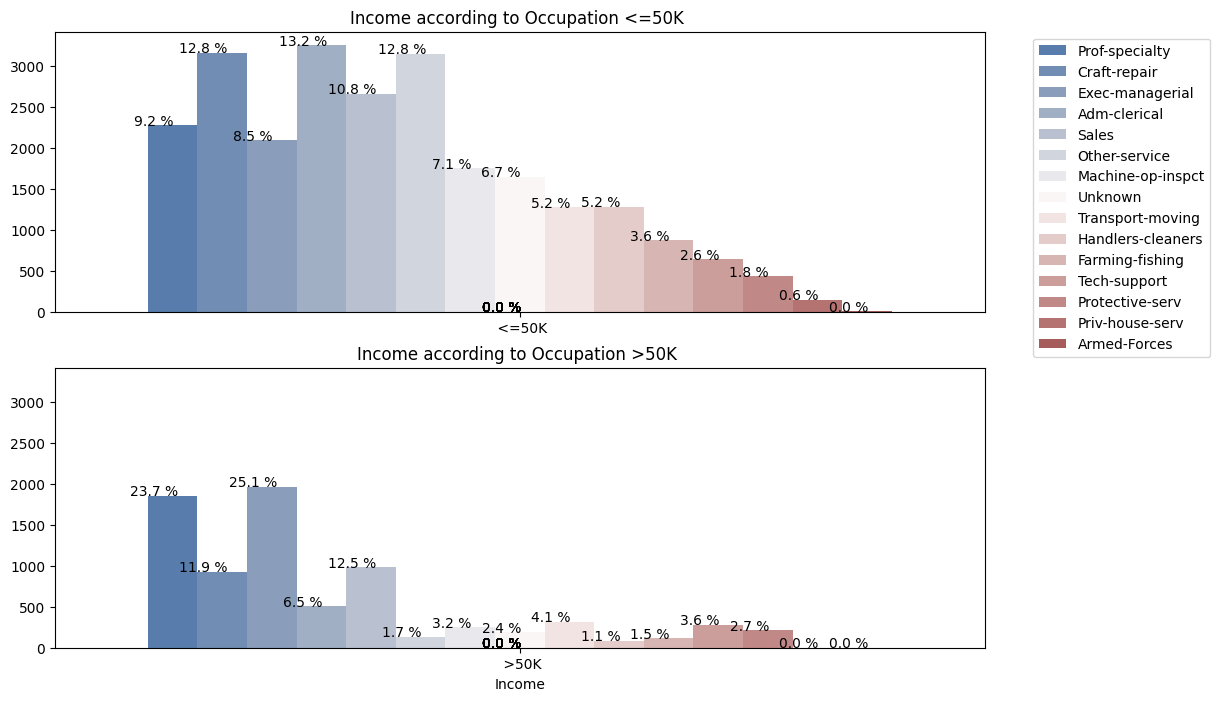

In [45]:
# Compare Occupation vs Income
col = 'Occupation' #4

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharey=True)

df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

sns.countplot(x='Income', hue=col, data=df_less_50K, palette='vlag', ax=axes[0])
show_percentage(axes[0], len(df_less_50K)) 
axes[0].set_title(f"Income according to {col} <=50K ", size=12, y=1);
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].set_xlabel('', size=10, labelpad=8)
axes[0].legend(loc='upper right', bbox_to_anchor=(1.25, 1))

sns.countplot(x='Income', hue=col, data=df_more_50K, palette='vlag', ax=axes[1])
show_percentage(axes[1], len(df_more_50K)) 
axes[1].set_title(f"Income according to {col} >50K ", size=12, y=1);
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].legend().remove()

plt.show()

Based on the data presented, the occupations most commonly associated with incomes over $50,000 are as follows: 25.1% in Exec-managerial roles, 23.7% in Prof-specialty occupations, 12.5% in Sales positions, 11.9% in Craft-repair jobs, and 6.5% in Adm-clerical roles. All other occupations account for less than 4.2% representation each.

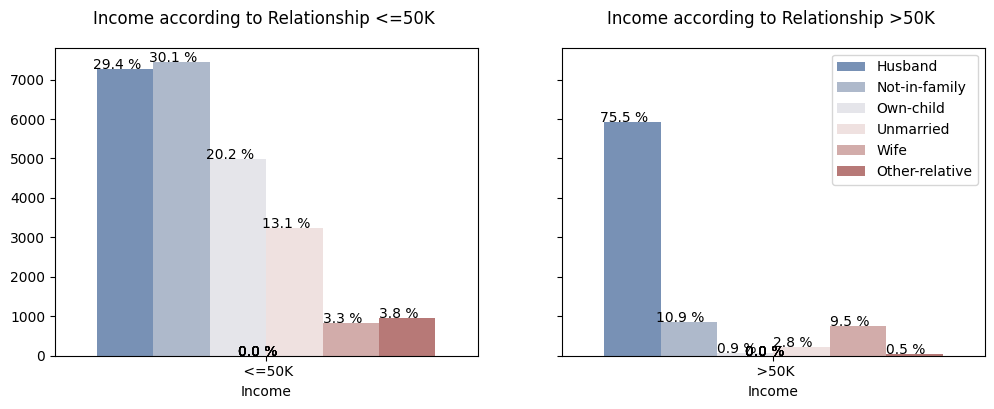

In [46]:
# Compare Relationship vs Income
col = 'Relationship' #5

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

sns.countplot(x='Income', hue=col, data=df_less_50K, palette='vlag', ax=axes[0])
show_percentage(axes[0], len(df_less_50K)) 
axes[0].set_title(f"Income according to {col} <=50K ", size=12, y=1.05);
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].legend().remove()

sns.countplot(x='Income', hue=col, data=df_more_50K, palette='vlag', ax=axes[1])
show_percentage(axes[1], len(df_more_50K)) 
axes[1].set_title(f"Income according to {col} >50K ", size=12, y=1.05);
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].legend(loc='upper right')

plt.show()

Among those earning over $50,000, 95.9% are categorized into family roles as follows: 75.5% as husbands, 10.9% as not-in-family, and 9.5% as wives. Conversely, individuals earning $50,000 or less predominantly fall into these groups: 30.1% not-in-family, 29.4% husbands, 20.2% own-child, and 13.1% unmarried, totaling 92.8%.

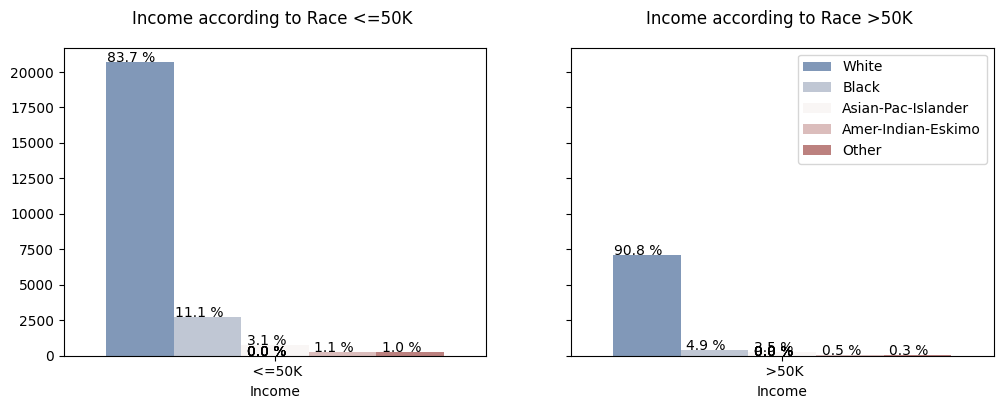

In [47]:
# Compare Race vs Income
col = 'Race' #6

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

sns.countplot(x='Income', hue=col, data=df_less_50K, palette='vlag', ax=axes[0])
show_percentage(axes[0], len(df_less_50K)) 
axes[0].set_title(f"Income according to {col} <=50K ", size=12, y=1.05);
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].legend().remove()

sns.countplot(x='Income', hue=col, data=df_more_50K, palette='vlag', ax=axes[1])
show_percentage(axes[1], len(df_more_50K)) 
axes[1].set_title(f"Income according to {col} >50K ", size=12, y=1.05);
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].legend(loc='upper right')

plt.show()

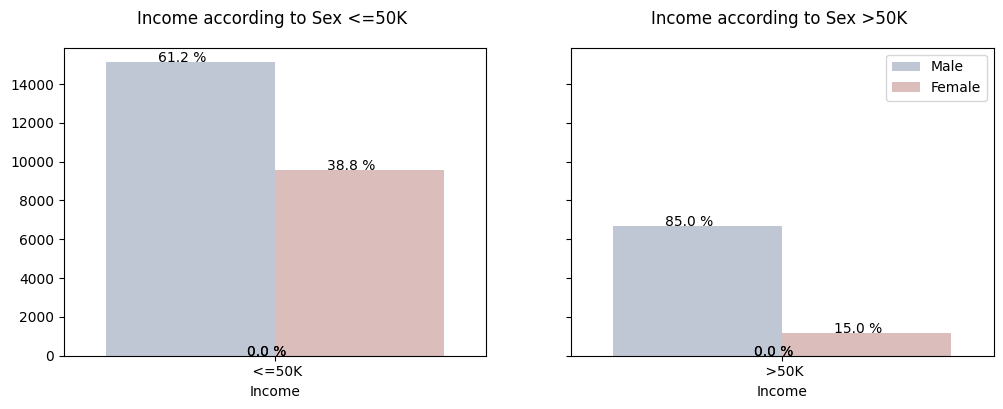

In [48]:

# Compare Sex vs Income
col = 'Sex' #7

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

sns.countplot(x='Income', hue=col, data=df_less_50K, palette='vlag', ax=axes[0])
show_percentage(axes[0], len(df_less_50K)) 
axes[0].set_title(f"Income according to {col} <=50K ", size=12, y=1.05);
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].legend().remove()

sns.countplot(x='Income', hue=col, data=df_more_50K, palette='vlag', ax=axes[1])
show_percentage(axes[1], len(df_more_50K)) 
axes[1].set_title(f"Income according to {col} >50K ", size=12, y=1.05);
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].legend(loc='upper right')

plt.show()

The gender distribution among those earning over $50,000 shows a ratio of 85% males to 15% females. In contrast, among those earning $50,000 or less, the ratio is 61.2% males to 38.8% females. This indicates that there are approximately 24% more males than females in the group with incomes exceeding $50,000.

In [49]:

# Function to format labels and specify the position for the percentages
def format_label_nc(pct):
    if (pct <= 2) & (pct > 1):   
        return f"\n{pct:.1f}%"
    return f"{pct:.1f}%"

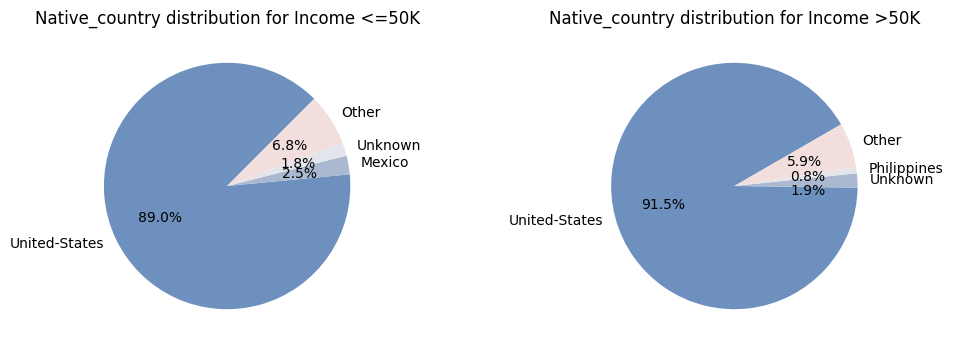

In [50]:
# Distribution of Native_country according to Income
col = 'Native_country' #8

sns.set_palette('vlag')

# Filter the data for the two income categories
df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

# Calculate the counts for each 'Marital_status' category in each income group
counts_less_50K = df_less_50K[col].value_counts()
counts_more_50K = df_more_50K[col].value_counts()

# Create subplots for the pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Select 3 top categories for 'Income <=50K'
top_categories = counts_less_50K.nlargest(3)
labels = top_categories.index.to_list()
labels.append('Other')
data = top_categories.to_list()
data.append(counts_less_50K.sum() - top_categories.sum())

# Plot pie chart for 'Income <=50K'
axes[0].pie(data, labels=labels, autopct='%1.1f%%', startangle=45)
axes[0].set_title(f"{col} distribution for Income <=50K")

# Select 3 top categories for 'Income >50K'
top_categories = counts_more_50K.nlargest(3)
labels = top_categories.index.to_list()
labels.append('Other')
data = top_categories.to_list()
data.append(counts_more_50K.sum() - top_categories.sum())

# Plot pie chart for 'Income >50K'
axes[1].pie(data, labels=labels,  autopct=format_label_nc, startangle=30)
axes[1].set_title(f"{col} distribution for Income >50K")

plt.show()

Since the majority of the samples are from the United States, they represent the largest group in both income categories (>50K and <=50K). However, for those earning over $50,000, the second most represented group is from the Philippines, comprising 0.8%, excluding the 1.9% attributed to missing data. Conversely, among those earning $50,000 or less, the second most represented group is from Mexico, accounting for 2.5%.

## Multivariate Analysis

### Pairplot

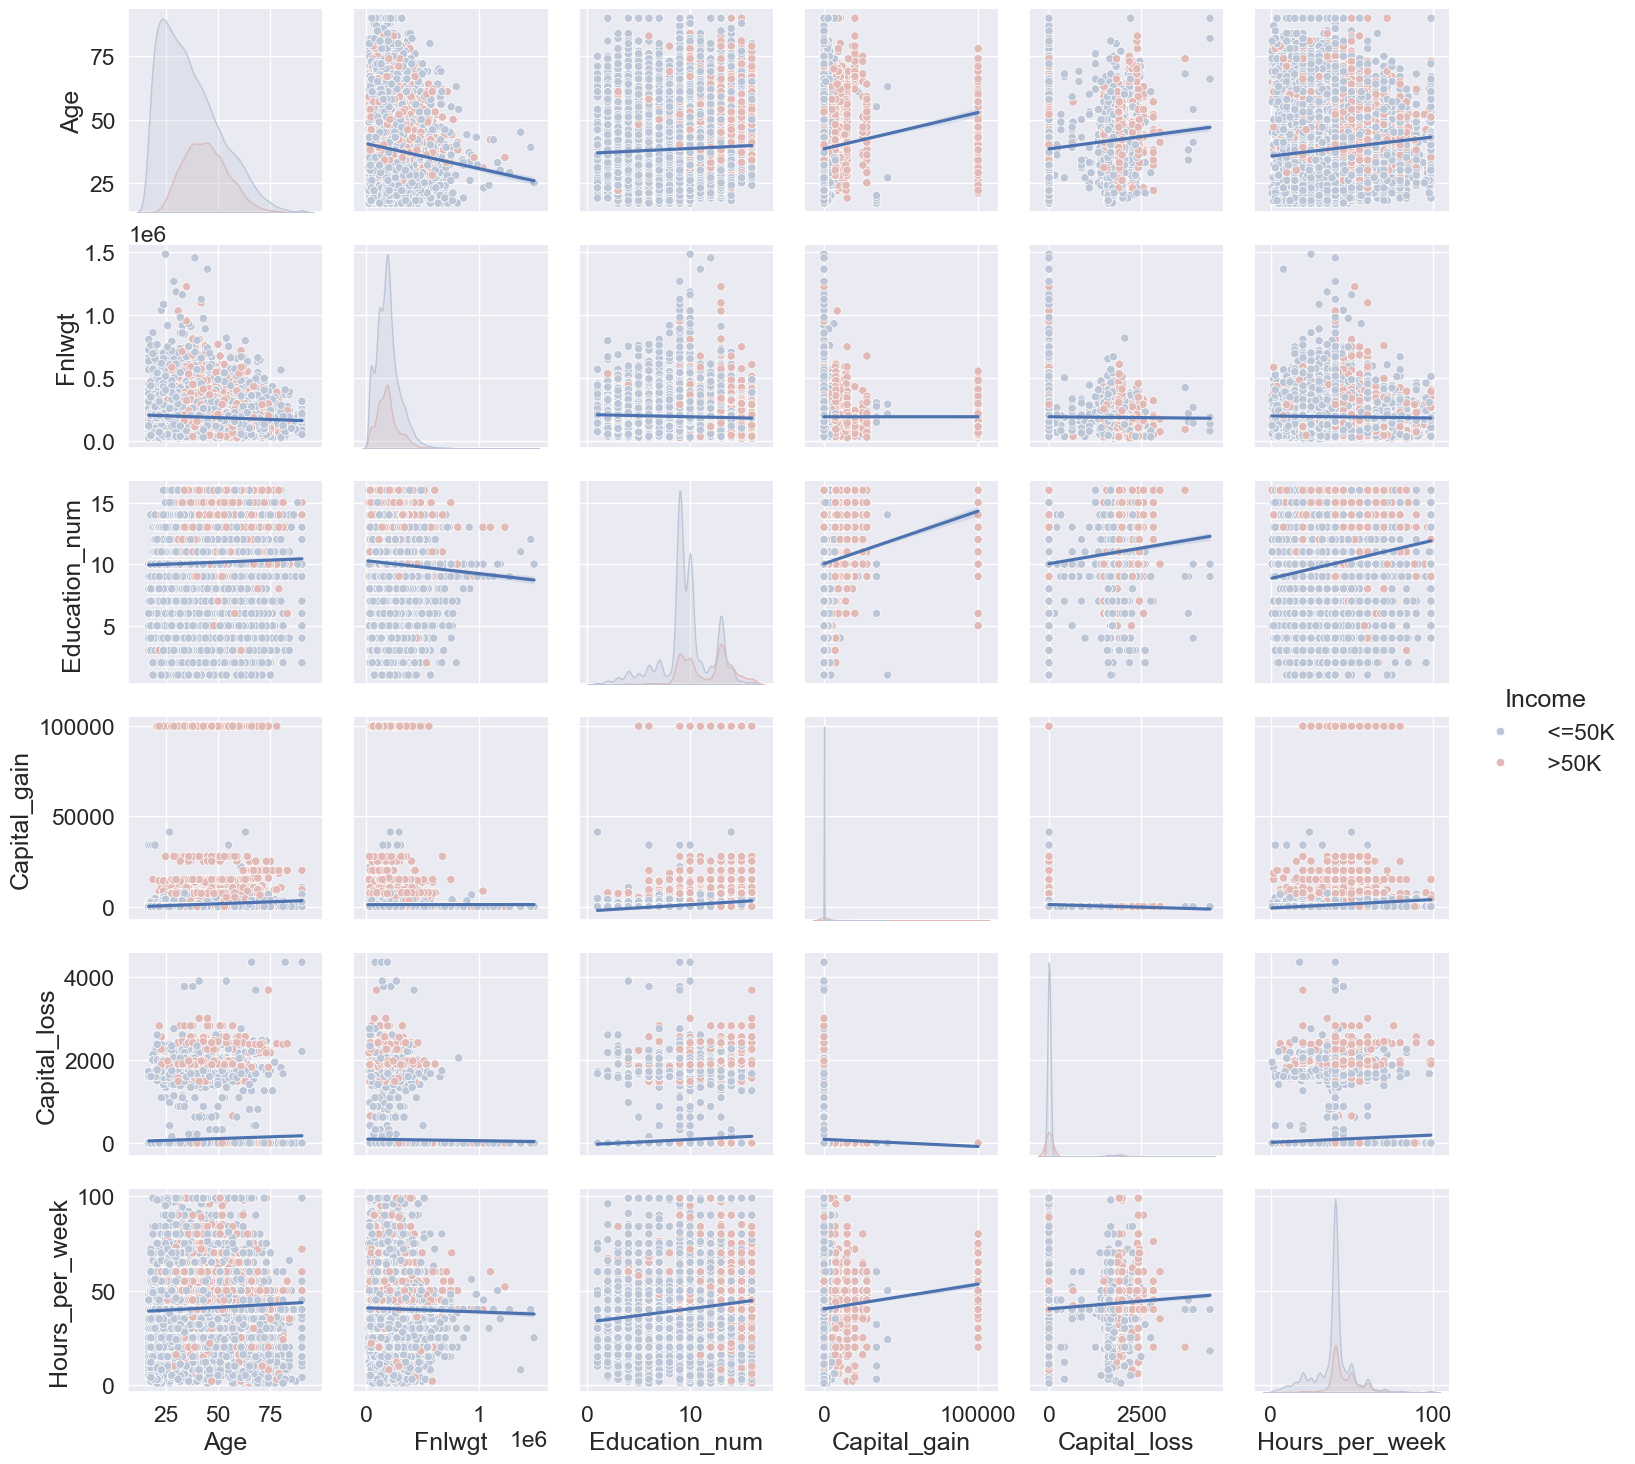

In [51]:

sns.set(font_scale=1.5)  
grid = sns.pairplot(df, hue='Income', palette = "vlag")

# Add a regression line for non-diagonal plots
for ax in grid.axes.flat[1:-1]: # first and last axes are not considered
    if ax.get_xlabel() != ax.get_ylabel():
        sns.regplot(data=df, x=ax.get_xlabel(), y=ax.get_ylabel(), scatter=False, ax=ax, color='b')

plt.show()

There is a positive correlation between Education_num, Capital_gain, and Hours_per_week.

## Encoding the target variable

In [52]:
# Eliminating extra spaces 
df['Income'] = df['Income'].str.strip()

df['Income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [53]:
df['Income'] = df['Income'].map({'<=50K': 0, '>50K': 1})
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Education_bk
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,Bachelors
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,HS-grad
2,53,Private,234721,Below High School,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,11th
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,Bachelors
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0,Masters


## Correlation between target variable and independent variables.

In [54]:
# Selecting only numeric columns
numeric_cols = df.select_dtypes(include='number')

# Calculating correlation matrix
cor = numeric_cols.corr()


In [55]:
cor

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
Age,1.000000,-0.076448,0.036224,0.077676,0.057745,0.068515,0.234039
Fnlwgt,-0.076448,1.000000,-0.043353,0.000433,-0.010267,-0.018900,-0.009521
Education_num,0.036224,-0.043353,1.000000,0.122661,0.079901,0.148426,0.335299
Capital_gain,0.077676,0.000433,0.122661,1.000000,-0.031638,0.078408,0.223340
Capital_loss,0.057745,-0.010267,0.079901,-0.031638,1.000000,0.054229,0.150498
Hours_per_week,0.068515,-0.018900,0.148426,0.078408,0.054229,1.000000,0.229659
Income,0.234039,-0.009521,0.335299,0.223340,0.150498,0.229659,1.000000


In [56]:
# Listing the correlation coeficients with the target variable 
corr_df = cor.unstack().sort_values(ascending=False).reset_index()
corr_df.columns = ['Feature A', 'Feature B', 'Corr coef']
corr_df[(corr_df['Feature A'] == 'Income') ]

,Feature A,Feature B,Corr coef
6,Income,Income,1.000000
8,Income,Education_num,0.335299
9,Income,Age,0.234039
11,Income,Hours_per_week,0.229659
14,Income,Capital_gain,0.223340
15,Income,Capital_loss,0.150498
37,Income,Fnlwgt,-0.009521


The label has a medium positive correlation with Education_num, and a low positive correlation with Age, Hours_per_week, Capital_gain, and Capital-loss.

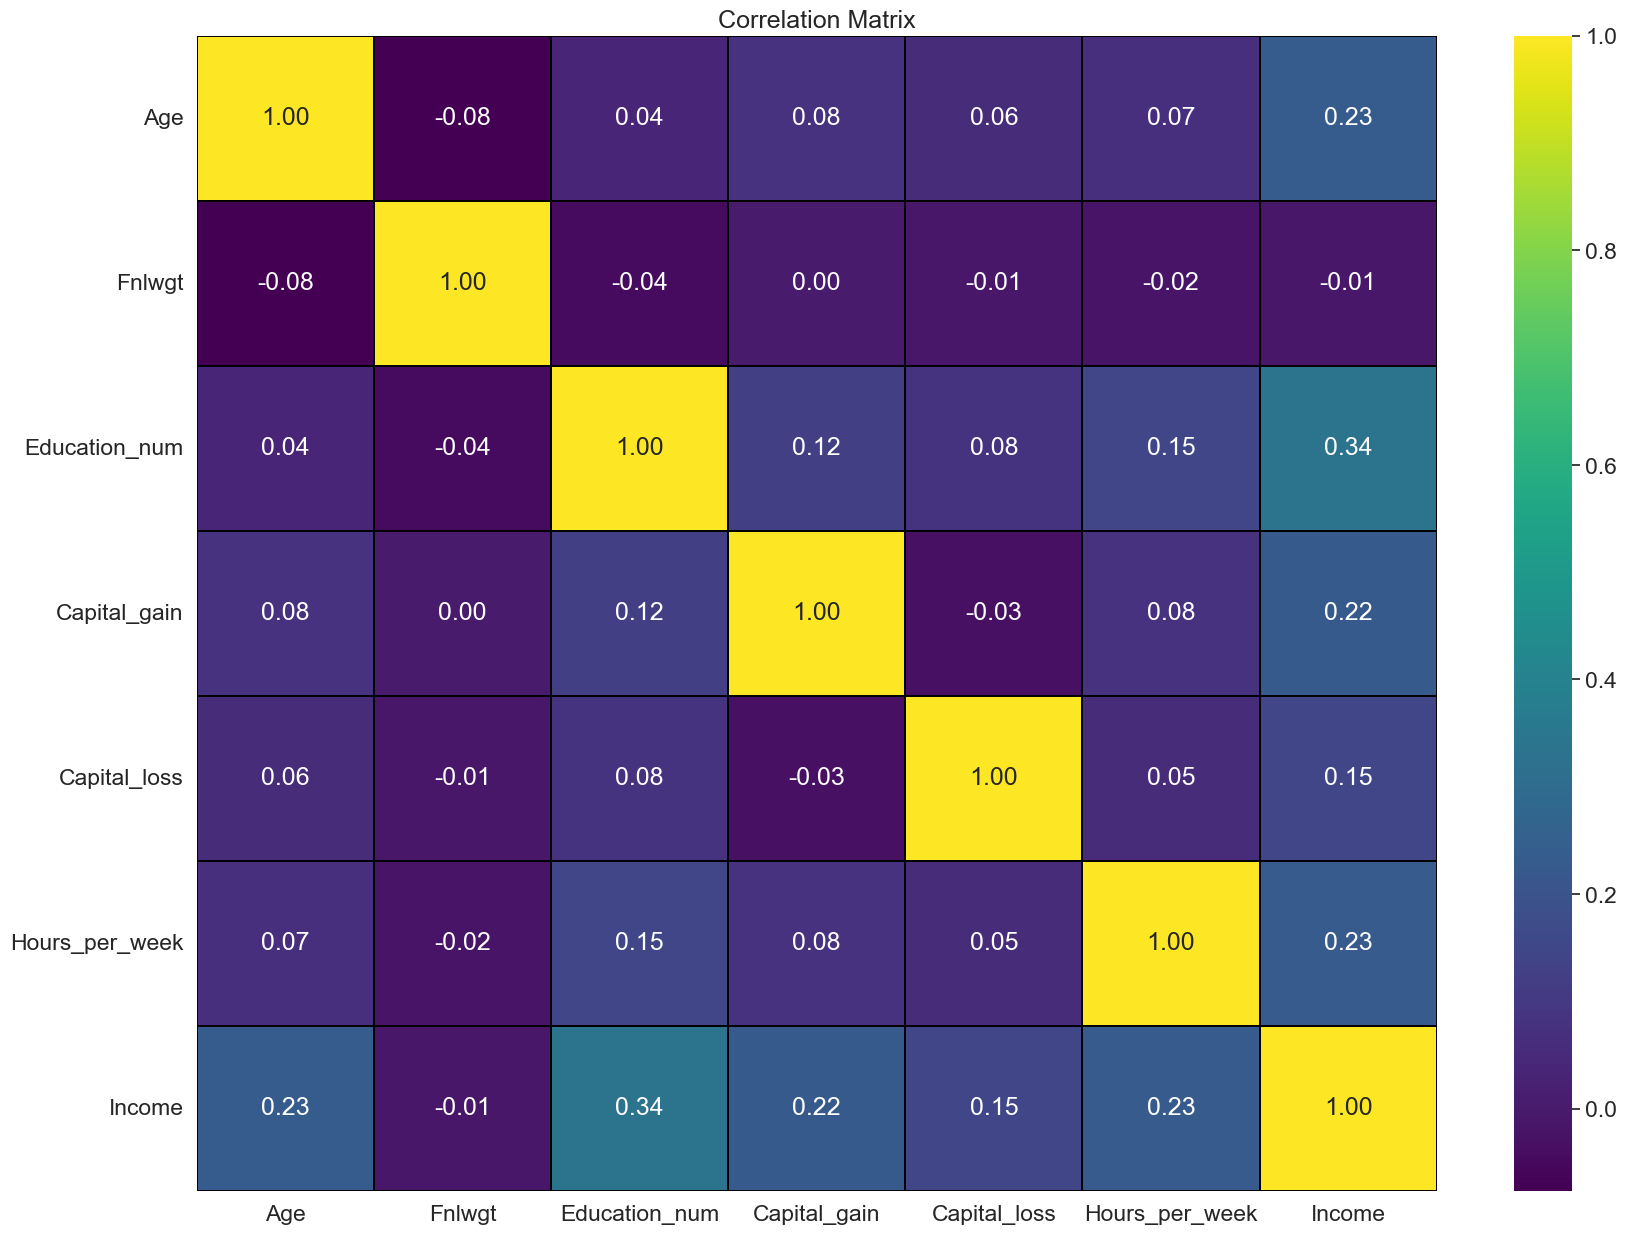

In [57]:
sns.set(font_scale=1.5)  

# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(cor, linewidths = 0.1, fmt = ".2f", linecolor = 'black', cmap='viridis', annot=True)
plt.yticks(rotation = 0)
plt.title('Correlation Matrix')
plt.show()

The target is medium correlated with Education_num(+0.34), and low correlated with Hours_per_week(+0.23), Age(+0.23), Capital_gain(+0.22), and Capital_loss(+0.15)

The Education_num is slightly correlated with Hours_per_week(+0.15) and Capital_gain(+0.12)

# 2. Preprocessing Data

#### Missing values

In [58]:

# Replace Unknown for np.NaN
for col in ['Workclass', 'Occupation', 'Native_country']:
    print(f"Values for {col}:\n{df[col].value_counts(dropna=False)[:8]}\n")
    df[col] = np.where(df[col]=='Unknown', np.NaN, df[col])
    print(f"New Values for {col}:\n{df[col].value_counts(dropna=False)[:8]}\n")

Values for Workclass:
Workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
Unknown              1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Name: count, dtype: int64

New Values for Workclass:
Workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
NaN                  1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Name: count, dtype: int64

Values for Occupation:
Occupation
Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3767
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Unknown              1843
Name: count, dtype: int64

New Values for Occupation:
Occupation
Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3767
Sales                3650
Other-service        3291

In [59]:

# checking the null values
missing_val = df.isnull().sum().to_frame("Null values")

# Calculate the % of the null values
missing_val["% of missing"] = round(missing_val['Null values'] / len(df) * 100,2)

missing_val

,Null values,% of missing
Age,0,0.00
Workclass,1836,5.64
Fnlwgt,0,0.00
Education,0,0.00
Education_num,0,0.00
Marital_status,0,0.00
Occupation,1843,5.66
Relationship,0,0.00
Race,0,0.00
Sex,0,0.00


For the Native_country column less than 1.80% of missing values, then we will drop them. For the other columns(Workclass and Occupation) we will impute the missing values

### Dropping missing values 

In [60]:
cols_drop = missing_val[(missing_val['% of missing'] > 0) & (missing_val['% of missing'] < 2)].index.to_list()
cols_drop

['Native_country']

In [61]:

# Dropping the missing values with % of missing less than 2.4%
df_new = df.dropna(subset=cols_drop)

print(f"{df.shape[0] - df_new.shape[0]} rows with missing values were deleted.")
print(f"This represent {round((df.shape[0] - df_new.shape[0]) / df.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df.shape[1]} columns.")
df = df_new.copy()

582 rows with missing values were deleted.
This represent 1.79% of the data.
In the new dataset there are 31954 rows and 16 columns.


### Imputing missing values

In [62]:
cols_more_than_thr = missing_val[missing_val['% of missing'] > 2].index.to_list()
cols_more_than_thr

['Workclass', 'Occupation']

For Workclass and Occupation columns we will use the mode to impute the missing values since they are categorical variables.

In [63]:
# listing the possible imputation values 
for col in cols_more_than_thr:
    print(f"Column = {col} Mode = {df[col].mode()[0]}")

Column = Workclass Mode = Private
Column = Occupation Mode = Prof-specialty


In [64]:
impu_val = {}

# Define Columns to group the data
group_col = ['Income','Education']

# List of mode according
for col in cols_more_than_thr:
    impu_val[col] = df.groupby(group_col)[[col]].agg(lambda x: x.mode().iloc[0])
    print(f"Imputation values for {col}:\n{impu_val[col]}\n")

Imputation values for Workclass:
                         Workclass
Income Education                  
0      Doctorate           Private
       Masters             Private
       Bachelors           Private
       Associate           Private
       Prof-school         Private
       Some-college        Private
       HS-grad             Private
       Below High School   Private
1      Doctorate           Private
       Masters             Private
       Bachelors           Private
       Associate           Private
       Prof-school         Private
       Some-college        Private
       HS-grad             Private
       Below High School   Private

Imputation values for Occupation:
                               Occupation
Income Education                         
0      Doctorate           Prof-specialty
       Masters             Prof-specialty
       Bachelors           Prof-specialty
       Associate             Adm-clerical
       Prof-school         Prof-specialty
       S

For Workclass we will use Private to impute the missing values.
For Occupation we will use the corresponding mode according to Income and Education to impute the missing values.

In [65]:
# Imputing missing values for Workclass 
impute_value = 'Private'
col = 'Workclass'
print(f"Impute the missing values in {col} with the mode: {impute_value}")

# Fill missing values with the impute value 
df[col].fillna(impute_value, inplace=True)
print(f"Missing values in {col}: {df[col].isnull().sum()}\n")

Impute the missing values in Workclass with the mode: Private
Missing values in Workclass: 0



In [66]:
# Imputing missing values for Occupation
col = 'Occupation'
mapping_dict = impu_val[col].to_dict()
print(f"Impute the missing values in {col} with the mode:")
display(mapping_dict)

# Fill missing values with the impute value 
df[col] = df[col].fillna(df.apply(lambda row: mapping_dict[col].get((row['Income'], row['Education']), row[col]), axis=1))
print(f"Missing values in {col}: {df[col].isnull().sum()}\n")

Impute the missing values in Occupation with the mode:


{'Occupation': {(0, 'Doctorate'): 'Prof-specialty',
  (0, 'Masters'): 'Prof-specialty',
  (0, 'Bachelors'): 'Prof-specialty',
  (0, 'Associate'): 'Adm-clerical',
  (0, 'Prof-school'): 'Prof-specialty',
  (0, 'Some-college'): 'Adm-clerical',
  (0, 'HS-grad'): 'Craft-repair',
  (0, 'Below High School'): 'Other-service',
  (1, 'Doctorate'): 'Prof-specialty',
  (1, 'Masters'): 'Prof-specialty',
  (1, 'Bachelors'): 'Exec-managerial',
  (1, 'Associate'): 'Exec-managerial',
  (1, 'Prof-school'): 'Prof-specialty',
  (1, 'Some-college'): 'Exec-managerial',
  (1, 'HS-grad'): 'Craft-repair',
  (1, 'Below High School'): 'Craft-repair'}}

Missing values in Occupation: 0



In [67]:
 df.isnull().sum().sum()

0

## Encoding Categorical features

In [69]:
 # Checking the unique values of the categorical independent variables
for i, col in enumerate(cat_col[:-1]):
    print(f"{i+1}.{col}:\n  {df[col].unique()}\n")

1.Workclass:
  ['Self-emp-not-inc' 'Private' 'State-gov' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

2.Education:
  ['Bachelors', 'HS-grad', 'Below High School', 'Masters', 'Some-college', 'Associate', 'Doctorate', 'Prof-school']
Categories (8, object): ['Doctorate' < 'Masters' < 'Bachelors' < 'Associate' < 'Prof-school' < 'Some-college' < 'HS-grad' < 'Below High School']

3.Marital_status:
  ['Married-civ-spouse', 'Divorced', 'Married-spouse-absent', 'Never-married', 'Separated', 'Married-AF-spouse', 'Widowed']
Categories (7, object): ['Married-civ-spouse' < 'Never-married' < 'Divorced' < 'Separated' < 'Widowed' < 'Married-spouse-absent' < 'Married-AF-spouse']

4.Occupation:
  ['Exec-managerial' 'Handlers-cleaners' 'Prof-specialty' 'Other-service'
 'Adm-clerical' 'Sales' 'Transport-moving' 'Farming-fishing'
 'Machine-op-inspct' 'Tech-support' 'Craft-repair' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']

5.Relationship:
  ['Husband', 'Not-in-family',

In [71]:
from sklearn.preprocessing import LabelEncoder

category_mappings = {}
encoding_col = cat_col[:-1]

label_encoder = LabelEncoder()
for col in encoding_col:
    if col != 'Education':
        df[col] = df[col].astype('category')
    df[col] = label_encoder.fit_transform(df[col])
    
    # Store the mapping in a dictionary
    category_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print(col,'\n', category_mappings[col],'\n')
    
display(df.head())

Workclass 
 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7} 

Education 
 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7} 

Marital_status 
 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6} 

Occupation 
 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13} 

Relationship 
 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5} 

Race 
 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4} 

Sex 
 {0: 0, 1: 1} 

Native_country 
 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40} 



,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Education_bk
0,50,5,83311,1,13,2,3,0,4,1,0,0,13,38,0,Bachelors
1,38,3,215646,4,9,0,5,1,4,1,0,0,40,38,0,HS-grad
2,53,3,234721,2,7,2,5,0,2,1,0,0,40,38,0,11th
3,28,3,338409,1,13,2,9,5,2,0,0,0,40,4,0,Bachelors
4,37,3,284582,5,14,2,3,5,4,0,0,0,40,38,0,Masters


In [72]:
# Drop the Education_bk column 
df.drop('Education_bk', axis=1, inplace=True)

In [73]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,1,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,4,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,2,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,1,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,5,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,0,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,154374,4,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,151910,4,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,201490,4,9,4,0,3,4,1,0,0,20,38,0


## Removing outliers

In [74]:
# Detect outliers with zscore method
from scipy.stats import zscore

z = np.abs(zscore(df))
z

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0.835851,1.719607,1.006419,1.175260,1.143888,0.403777,0.697132,0.900879,0.388144,0.704503,0.145880,0.216076,2.221286,0.263667,0.563110
1,0.042660,0.084402,0.245224,0.132279,0.418939,1.729469,0.201495,0.278491,0.388144,0.704503,0.145880,0.216076,0.034085,0.263667,0.563110
2,1.055478,0.084402,0.425638,0.739414,1.200353,0.403777,0.201495,0.900879,1.993338,0.704503,0.145880,0.216076,0.034085,0.263667,0.563110
3,0.774752,0.084402,1.406333,1.175260,1.143888,0.403777,0.789779,2.211061,1.993338,1.419441,0.145880,0.216076,0.034085,5.305633,0.563110
4,0.115869,0.084402,0.897230,0.568125,1.534594,0.403777,0.697132,2.211061,0.388144,1.419441,0.145880,0.216076,0.034085,0.263667,0.563110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0.847961,0.084402,0.639212,1.611106,0.753181,0.403777,1.533235,2.211061,0.388144,1.419441,0.145880,0.216076,0.196100,0.263667,0.563110
32556,0.103758,0.084402,0.334295,0.132279,0.418939,0.403777,0.046323,0.900879,0.388144,0.704503,0.145880,0.216076,0.034085,0.263667,1.775851
32557,1.421524,0.084402,0.357600,0.132279,0.418939,2.247606,1.440588,1.588673,0.388144,1.419441,0.145880,0.216076,0.034085,0.263667,0.563110
32558,1.214007,0.084402,0.111334,0.132279,0.418939,0.921914,1.440588,0.966285,0.388144,0.704503,0.145880,0.216076,1.654234,0.263667,0.563110


In [75]:

# threshold = 3.5
df_new = df[(z<3.5).all(axis=1)]

print(f"{df.shape[0] - df_new.shape[0]} rows with outliers were deleted.")
print(f"This represent {round((df.shape[0] - df_new.shape[0]) / df.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df.shape[1]} columns.")
df_process = df_new.copy()
df_process

3235 rows with outliers were deleted.
This represent 10.12% of the data.
In the new dataset there are 28719 rows and 15 columns.


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,1,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,4,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,2,7,2,5,0,2,1,0,0,40,38,0
4,37,3,284582,5,14,2,3,5,4,0,0,0,40,38,0
5,49,3,160187,2,5,3,7,1,2,0,0,0,16,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,0,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,154374,4,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,151910,4,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,201490,4,9,4,0,3,4,1,0,0,20,38,0


## Feature engineering

we will apply feature engineering to transform the columns dividing into intervals (binning). Binning can make the interpretation of the relationship between the variable and the target more intuitive.

Number of bins selected for Capital_gain: 32


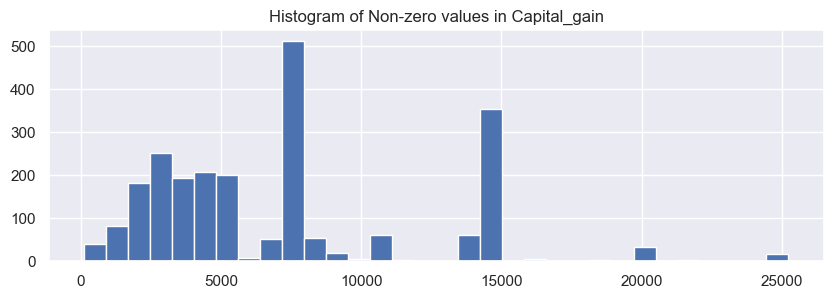

In [76]:
# Filter the non-zero values 
col = 'Capital_gain'
non_zero_values = df_process[col][df_process[col] != 0]

# Styling the plot
sns.set(font_scale=1)
plt.figure(figsize=(10, 3))

# Plot the histograma ('auto' uses a heuristic to determine the number of bins)
n, bins, _ = plt.hist(non_zero_values, bins='auto') 
plt.title(f"Histogram of Non-zero values in {col}")

# Get the number of bins chosen automatically
num_bins_auto = len(bins) - 1
print(f'Number of bins selected for {col}: {num_bins_auto}')
plt.show()

In [77]:
# Dividing into intervals 
df_process[f'{col}_bin'] = pd.cut(df_process[col], bins=num_bins_auto, labels=False, include_lowest=True)

# Review the unique values of the new variable Capital_gain_bin
print(f"Unique values in {col}_bin: \n{df_process[f'{col}_bin'].unique()}\n")
print(f"Total of unique values in {col}_bin: {df_process[f'{col}_bin'].nunique()}")
print(f"Counts of {col}_bin:\n{df_process[f'{col}_bin'].value_counts()}")

Unique values in Capital_gain_bin: 
[ 0 17  6  3 18 19  9  5  1  4  2 25  8 10 31 13  7 27 11 20 12 14 23]

Total of unique values in Capital_gain_bin: 23
Counts of Capital_gain_bin:
Capital_gain_bin
0     26431
9       510
19      329
3       287
6       217
4       193
5       185
2       148
1        80
17       61
13       59
10       54
8        54
25       32
18       24
11       18
31       15
7         9
20        4
12        4
14        2
23        2
27        1
Name: count, dtype: int64


## Discretization of Capital_loss

Number of bins selected for Capital_loss: 8


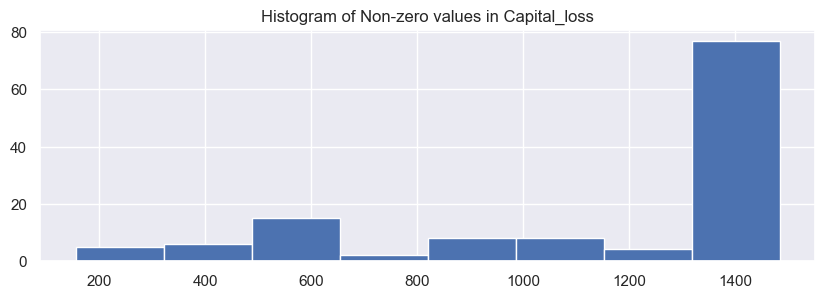

In [78]:
# Filter the non-zero values 
col = 'Capital_loss'
non_zero_values = df_process[col][df_process[col] != 0]

# Styling the plot
sns.set(font_scale=1)
plt.figure(figsize=(10, 3))

# Plot the histograma ('auto' uses a heuristic to determine the number of bins)
n, bins, _ = plt.hist(non_zero_values, bins='auto') 
plt.title(f"Histogram of Non-zero values in {col}")

# Get the number of bins chosen automatically
num_bins_auto = len(bins) - 1
print(f'Number of bins selected for {col}: {num_bins_auto}')
plt.show()

In [79]:
# Dividing into intervals 
df_process[f'{col}_bin'] = pd.cut(df_process[col], bins=num_bins_auto, labels=False, include_lowest=True)

# Review the unique values of the new variable Capital_gain_bin
print(f"Unique values in {col}_bin: \n{df_process[f'{col}_bin'].unique()}\n")
print(f"Total of unique values in {col}_bin: {df_process[f'{col}_bin'].nunique()}")
print(f"Counts of {col}_bin:\n{df_process[f'{col}_bin'].value_counts()}")

Unique values in Capital_loss_bin: 
[0 7 3 2 6 1 4 5]

Total of unique values in Capital_loss_bin: 8
Counts of Capital_loss_bin:
Capital_loss_bin
0    28595
7       77
3       15
4        8
5        8
1        7
6        6
2        3
Name: count, dtype: int64


In [80]:
df_process.drop(['Capital_gain','Capital_loss'], axis=1, inplace=True)


Since the Capital_gain_bin and Capital_loss_bin columns replace Capital_gain and Capital_loss, we do not longer need the last onces.

## Skewness Correction

In [81]:
# Checking the skewness in the data
df_skew = df_process.skew().sort_values(ascending=False).to_frame("Skew")
df_skew

,Skew
Capital_loss_bin,16.722005
Capital_gain_bin,5.270422
Income,1.318077
Relationship,0.754289
Fnlwgt,0.740824
Age,0.526743
Occupation,0.149833
Workclass,0.081899
Education,0.054968
Marital_status,-0.036429


Since only the columns Fnlwgt and Age are the numerical columns and alll other are categorical columns. We will use transformation methodss to remove the skewness

In [82]:
# Checking skewness using cuberoot, square-root and log method
skew_columns = ['Fnlwgt', 'Age']
df_transformed = pd.DataFrame()

for col in skew_columns:
    df_transformed[f"{col}_cbrt"] = np.cbrt(df_process[col])
    df_transformed[f"{col}_log"] = np.log(df_process[col])
    df_transformed[f"{col}_sqrt"] = np.sqrt(df_process[col])
        
# Adding the other columns
df_transformed = pd.concat([df_transformed, df_process[skew_columns]], axis=1)

In [83]:
# Comparing which transform method give better results
df_comp = df_transformed.skew().sort_index(ascending=False).to_frame("Skewness")

# Reset the index and identify the feature
df_comp.reset_index(inplace=True)
df_comp['feature'] = df_comp['index'].str.extract(r'^(.*)_.*')
df_comp['Skewness_abs'] = abs(df_comp['Skewness'])

# Check the calculated skeweness for 
display(df_comp[df_comp['feature'] == 'Age'] )

# Drop the records with no valid skewness
df_comp = df_comp[~df_comp.Skewness.isnull()]

# Find the indexes of the rows with the minimum 'Skewness_abs' values
min_indices = df_comp.groupby('feature')['Skewness_abs'].idxmin()

# Select the rows corresponding to the minimum values in Skewness_abs,
low_skewness = df_comp.loc[min_indices]
low_skewness

,index,Skewness,feature,Skewness_abs
4,Age_sqrt,0.194310,Age,0.194310
5,Age_log,-0.127116,Age,0.127116
6,Age_cbrt,0.086028,Age,0.086028


,index,Skewness,feature,Skewness_abs
6,Age_cbrt,0.086028,Age,0.086028
0,Fnlwgt_sqrt,-0.037652,Fnlwgt,0.037652


After comparing the resulting skewness, we are going to apply the square-root method for the Fnlwgt feature, and cube-root method to Age.

In [84]:
# Selecting columns to apply cube-root transform method
cbrt_columns = ['Age']
print(cbrt_columns)

# Update the df dataset with the transfor data with cube-root method.
for col in cbrt_columns:
    df_process[col] = np.cbrt(df_process[col])

['Age']


In [85]:
# Transform the Fnlwgt column - sqrt
df_process['Fnlwgt'] = np.sqrt(df_process['Fnlwgt'])

In [86]:
df_process[skew_columns].skew().sort_values(ascending=False).to_frame("Skewness after transform")


,Skewness after transform
Age,0.086028
Fnlwgt,-0.037652


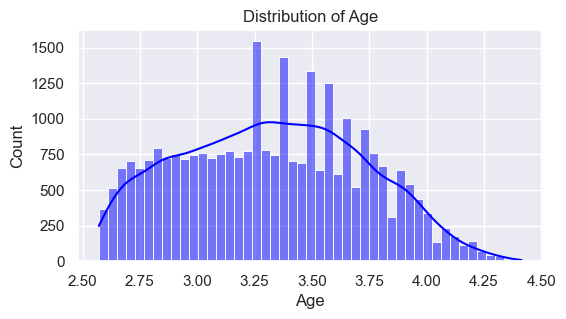

In [89]:
#### Visualising

column = 'Age'
plt.figure(figsize=(6, 3))
sns.histplot(data=df_process, x=column, kde=True, color='blue')
plt.title(f"Distribution of {column}")

plt.show()

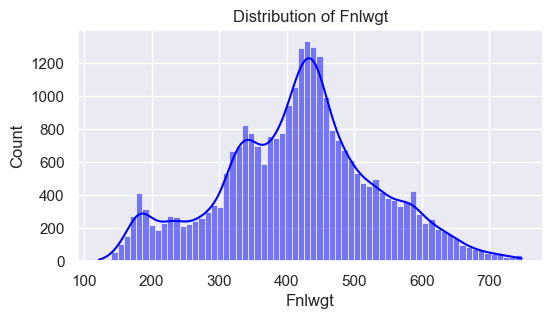

In [91]:
# Visualizing the distribution of the columns after removing skewness
column = 'Fnlwgt'
plt.figure(figsize=(6, 3))
sns.histplot(data=df_process, x=column, kde=True, color='blue')
plt.title(f"Distribution of {column}")

plt.show()

## Feature Scaling using Standard Scalarization

### Separating features and label

In [92]:
# Separating the independent and target variables into x and y 
x = df_process.drop('Income', axis=1)
y = df_process['Income']

print(f"Feature Dimension = {x.shape}")
print(f"Label Dimension = {y.shape}")

Feature Dimension = (28719, 14)
Label Dimension = (28719,)


## Scaling

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling the data 
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

display(x.head())

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Capital_gain_bin,Capital_loss_bin
0,0.905880,1.732301,-1.112790,-1.177281,1.190849,-0.408387,-0.686932,-0.914288,0.377817,0.713098,-2.318580,0.225161,-0.236272,-0.062337
1,0.096209,-0.080414,0.412125,0.125538,-0.425923,-1.724863,-0.193411,-0.291365,0.377817,0.713098,0.004689,0.225161,-0.236272,-0.062337
2,1.087532,-0.080414,0.586562,-0.743008,-1.234309,-0.408387,-0.193411,-0.914288,-2.288158,0.713098,0.004689,0.225161,-0.236272,-0.062337
3,0.021406,-0.080414,1.011584,0.559812,1.595042,-0.408387,-0.686932,2.200325,0.377817,-1.402331,0.004689,0.225161,-0.236272,-0.062337
4,0.843718,-0.080414,-0.144452,-0.743008,-2.042696,0.249850,0.300110,-0.291365,-2.288158,-1.402331,-2.060439,-5.193986,-0.236272,-0.062337


## Muticollinearity Analysis and Feature Selection

## VIF

In [94]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

,Features,VIF values
7,Relationship,1.671948
9,Sex,1.547357
0,Age,1.212265
5,Marital_status,1.154891
10,Hours_per_week,1.131502
4,Education_num,1.083965
8,Race,1.066504
11,Native_country,1.065517
12,Capital_gain_bin,1.048980
3,Education,1.021259


We can see that there is no VIF

## Balancing the Dataset

We will be applying SMOTE oversampling technique to balance the dataset

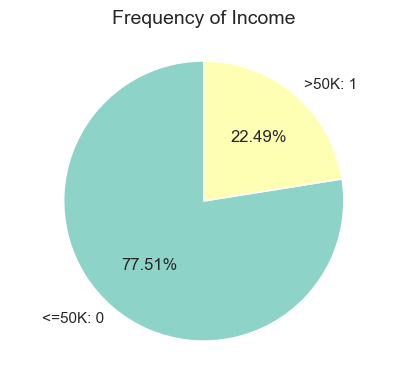

In [98]:
# Count the frequencies of target
target_counts = y.value_counts()

# Create a pie plot
sns.set_palette('Set3')
plt.figure(figsize=(5, 4))
plt.pie(target_counts, labels=['<=50K: 0', '>50K: 1'], autopct='%1.2f%%', startangle=90)

plt.title("Frequency of Income", size=14, y=1.05)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [99]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1, y1 = SM.fit_resample(x, y)

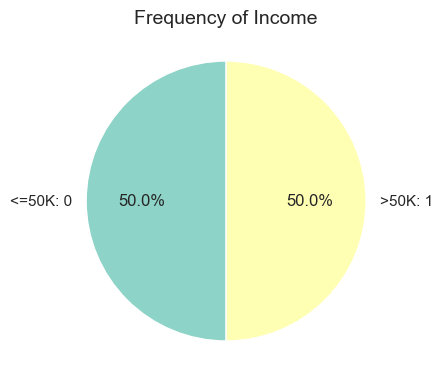

In [100]:
# Count the frequencies of target
target_counts = y1.value_counts()

# Create a pie plot
plt.figure(figsize=(5, 4))
plt.pie(target_counts, labels=['<=50K: 0', '>50K: 1'], autopct='%1.1f%%', startangle=90)

plt.title("Frequency of Income", size=14, y=1.05)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [101]:
X = x1
Y = y1

## Modelling

## Finding the best random state

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]

In [103]:
%%time
# Build the model
model = RandomForestClassifier()
random_state, acc = find_best_random_state(model, X, Y) 
print(f"Best accuracy is {round(acc,4)} at random_state {random_state}")

Best accuracy is 0.903 at random_state 7
CPU times: total: 4min 17s
Wall time: 21min 43s


## Creating train test split

In [104]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (31165, 14)
x_test shape:   (13357, 14)
y_train shape:  (31165,)
y_test shape:   (13357,)


## Classification Algorithms

In [105]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [106]:
# Functions 
def calc_accuracy(model, id_model):
    ''' Calculate the accuracy of the model. Return the accuracy, training accuracy, and the predicted values.'''
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    acc_train = model.score(x_train, y_train)
    
    print(f"\nModel: {id_model}")
    print(f"Confusion matrix: \n {confusion_matrix(y_test, y_pred)}")
    print(f"Classification report: \n {classification_report(y_test, y_pred)}" )
    print(f"Training Accuracy using {id_model} is {acc_train*100.0:.2f}%")
    print(f"The accuracy score using {id_model} is {round(acc*100.0, 2)}%")
    
    return [acc, acc_train, y_pred]

In [107]:
models = {'RandomForestClassifier' : RandomForestClassifier(), 
          'ExtraTreesClassifier': ExtraTreesClassifier(),
          'LogisticRegression': LogisticRegression(),
          'SVC': SVC(),
          'GradientBoostingClassifier': GradientBoostingClassifier(), 
          'AdaBoostClassifier': AdaBoostClassifier(), 
          'BaggingClassifier': BaggingClassifier()}

# Setting up for saving the results of each model
df_model_accuracy = pd.DataFrame(columns=['id','Model','Training Accuracy','Model Accuracy Score'])
y_pred = {}

## RandomForestClassifier

In [109]:
%%time
id_model = 'RandomForestClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
model_metrics_df = pd.DataFrame([model_metrics])

df_model_accuracy = pd.concat([df_model_accuracy, model_metrics_df], ignore_index=True)
y_pred[id_model] = pred


Model: RandomForestClassifier
Confusion matrix: 
 [[5878  768]
 [ 522 6189]]
Classification report: 
               precision    recall  f1-score   support

           0       0.92      0.88      0.90      6646
           1       0.89      0.92      0.91      6711

    accuracy                           0.90     13357
   macro avg       0.90      0.90      0.90     13357
weighted avg       0.90      0.90      0.90     13357

Training Accuracy using RandomForestClassifier is 100.00%
The accuracy score using RandomForestClassifier is 90.34%
CPU times: total: 4.8 s
Wall time: 7.54 s


## Extra Trees Classifier

In [110]:
%%time
id_model = 'ExtraTreesClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
model_metrics_df = pd.DataFrame([model_metrics])

df_model_accuracy = pd.concat([df_model_accuracy, model_metrics_df], ignore_index=True)
y_pred[id_model] = pred


Model: ExtraTreesClassifier
Confusion matrix: 
 [[5839  807]
 [ 455 6256]]
Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.88      0.90      6646
           1       0.89      0.93      0.91      6711

    accuracy                           0.91     13357
   macro avg       0.91      0.91      0.91     13357
weighted avg       0.91      0.91      0.91     13357

Training Accuracy using ExtraTreesClassifier is 100.00%
The accuracy score using ExtraTreesClassifier is 90.55%
CPU times: total: 2.91 s
Wall time: 4.63 s


## Logistic Regression

In [111]:
%%time

id_model = 'LogisticRegression'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
model_metrics_df = pd.DataFrame([model_metrics])

df_model_accuracy = pd.concat([df_model_accuracy, model_metrics_df], ignore_index=True)
y_pred[id_model] = pred


Model: LogisticRegression
Confusion matrix: 
 [[5113 1533]
 [1436 5275]]
Classification report: 
               precision    recall  f1-score   support

           0       0.78      0.77      0.77      6646
           1       0.77      0.79      0.78      6711

    accuracy                           0.78     13357
   macro avg       0.78      0.78      0.78     13357
weighted avg       0.78      0.78      0.78     13357

Training Accuracy using LogisticRegression is 76.67%
The accuracy score using LogisticRegression is 77.77%
CPU times: total: 15.6 ms
Wall time: 72 ms


## Support Vector Machine Classifier

In [112]:
%%time

id_model = 'SVC'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
model_metrics_df = pd.DataFrame([model_metrics])

df_model_accuracy = pd.concat([df_model_accuracy, model_metrics_df], ignore_index=True)
y_pred[id_model] = pred


Model: SVC
Confusion matrix: 
 [[5125 1521]
 [ 655 6056]]
Classification report: 
               precision    recall  f1-score   support

           0       0.89      0.77      0.82      6646
           1       0.80      0.90      0.85      6711

    accuracy                           0.84     13357
   macro avg       0.84      0.84      0.84     13357
weighted avg       0.84      0.84      0.84     13357

Training Accuracy using SVC is 83.89%
The accuracy score using SVC is 83.71%
CPU times: total: 39.2 s
Wall time: 1min


## Gradient Boosting Classifier

In [113]:
%%time

id_model = 'GradientBoostingClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
model_metrics_df = pd.DataFrame([model_metrics])

df_model_accuracy = pd.concat([df_model_accuracy, model_metrics_df], ignore_index=True)
y_pred[id_model] = pred


Model: GradientBoostingClassifier
Confusion matrix: 
 [[5523 1123]
 [ 653 6058]]
Classification report: 
               precision    recall  f1-score   support

           0       0.89      0.83      0.86      6646
           1       0.84      0.90      0.87      6711

    accuracy                           0.87     13357
   macro avg       0.87      0.87      0.87     13357
weighted avg       0.87      0.87      0.87     13357

Training Accuracy using GradientBoostingClassifier is 86.72%
The accuracy score using GradientBoostingClassifier is 86.7%
CPU times: total: 4.62 s
Wall time: 7.48 s


## AdaBoost Classifier

In [114]:
%%time

id_model = 'AdaBoostClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
model_metrics_df = pd.DataFrame([model_metrics])

df_model_accuracy = pd.concat([df_model_accuracy, model_metrics_df], ignore_index=True)
y_pred[id_model] = pred


Model: AdaBoostClassifier
Confusion matrix: 
 [[5499 1147]
 [ 812 5899]]
Classification report: 
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      6646
           1       0.84      0.88      0.86      6711

    accuracy                           0.85     13357
   macro avg       0.85      0.85      0.85     13357
weighted avg       0.85      0.85      0.85     13357

Training Accuracy using AdaBoostClassifier is 85.04%
The accuracy score using AdaBoostClassifier is 85.33%
CPU times: total: 984 ms
Wall time: 1.95 s


## Bagging Classifier

In [115]:
%%time

id_model = 'BaggingClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
model_metrics_df = pd.DataFrame([model_metrics])

df_model_accuracy = pd.concat([df_model_accuracy, model_metrics_df], ignore_index=True)
y_pred[id_model] = pred


Model: BaggingClassifier
Confusion matrix: 
 [[5926  720]
 [ 765 5946]]
Classification report: 
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      6646
           1       0.89      0.89      0.89      6711

    accuracy                           0.89     13357
   macro avg       0.89      0.89      0.89     13357
weighted avg       0.89      0.89      0.89     13357

Training Accuracy using BaggingClassifier is 99.25%
The accuracy score using BaggingClassifier is 88.88%
CPU times: total: 1.97 s
Wall time: 2.64 s


## Comparing models

In [116]:

df_model_accuracy = df_model_accuracy.sort_values(by='Model Accuracy Score', ascending=False)
display(df_model_accuracy)

,id,Model,Training Accuracy,Model Accuracy Score
2,ExtraTreesClassifier,"(ExtraTreeClassifier(random_state=1233475657),...",1.000000,0.905518
1,RandomForestClassifier,"(DecisionTreeClassifier(max_features='sqrt', r...",1.000000,0.903421
0,RandomForestClassifier,"(DecisionTreeClassifier(max_features='sqrt', r...",1.000000,0.901400
7,BaggingClassifier,(DecisionTreeClassifier(random_state=176687379...,0.992524,0.888822
5,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,0.867159,0.867036
6,AdaBoostClassifier,"(DecisionTreeClassifier(max_depth=1, random_st...",0.850441,0.853335
4,SVC,SVC(),0.838890,0.837089
3,LogisticRegression,LogisticRegression(),0.766661,0.777720


#### Extra tree classifier is the best model so far. Lets apply hyper parameter tuning to findout if any other algorithm performs better

## Cross validation score

In [117]:
def checking_cvscore(id_model, model, y_pred):
    score = cross_val_score(model, X, Y, cv=5, scoring='accuracy')
    
    score_mean = score.mean()
    diff = accuracy_score(y_test, y_pred) - score_mean
    
    print(f"\n::: Model: {id_model}::: \nscore:{score}")
    print(f"Score mean: {score_mean:.4f}")
    print(f"Difference between Accuracy score and cross validation score is {diff:.4f}")
    return [score_mean, diff]

In [118]:
# Define the new columns for CV metrics
df_model_accuracy['CV score mean'] = np.NaN
df_model_accuracy['Diff Acc and cv score'] = np.NaN
# Setting the id model as index
df_model_accuracy.set_index("id", inplace=True)

In [119]:
%%time
# Evaluate cross-validation for each model and save the scores.
for id_model, model in models.items():
    score_mean, diff = checking_cvscore(id_model, model, y_pred[id_model])
    
    df_model_accuracy.loc[id_model, 'CV score mean'] = score_mean
    df_model_accuracy.loc[id_model, 'Diff Acc and cv score'] = diff


::: Model: RandomForestClassifier::: 
score:[0.8285233  0.88714206 0.92610063 0.93261456 0.92497754]
Score mean: 0.8999
Difference between Accuracy score and cross validation score is 0.0035

::: Model: ExtraTreesClassifier::: 
score:[0.86558113 0.90241437 0.9269991  0.9319407  0.92913297]
Score mean: 0.9112
Difference between Accuracy score and cross validation score is -0.0057

::: Model: LogisticRegression::: 
score:[0.76384054 0.77024144 0.76718329 0.774708   0.77190027]
Score mean: 0.7696
Difference between Accuracy score and cross validation score is 0.0081

::: Model: SVC::: 
score:[0.82582819 0.82605278 0.83479335 0.83827493 0.84186882]
Score mean: 0.8334
Difference between Accuracy score and cross validation score is 0.0037

::: Model: GradientBoostingClassifier::: 
score:[0.8128018  0.85165637 0.88252471 0.88140162 0.87320305]
Score mean: 0.8603
Difference between Accuracy score and cross validation score is 0.0067

::: Model: AdaBoostClassifier::: 
score:[0.80561482 0.84188

In [121]:
df_model_accuracy.sort_values(by=['Model Accuracy Score', 'CV score mean','Diff Acc and cv score'], ascending=[False, False, True])


,Model,Training Accuracy,Model Accuracy Score,CV score mean,Diff Acc and cv score
id,,,,,
ExtraTreesClassifier,"(ExtraTreeClassifier(random_state=1233475657),...",1.000000,0.905518,0.911214,-0.005696
RandomForestClassifier,"(DecisionTreeClassifier(max_features='sqrt', r...",1.000000,0.903421,0.899872,0.003550
RandomForestClassifier,"(DecisionTreeClassifier(max_features='sqrt', r...",1.000000,0.901400,0.899872,0.003550
BaggingClassifier,(DecisionTreeClassifier(random_state=176687379...,0.992524,0.888822,0.880691,0.008132
GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,0.867159,0.867036,0.860318,0.006719
AdaBoostClassifier,"(DecisionTreeClassifier(max_depth=1, random_st...",0.850441,0.853335,0.846886,0.006450
SVC,SVC(),0.838890,0.837089,0.833364,0.003726
LogisticRegression,LogisticRegression(),0.766661,0.777720,0.769575,0.008145


## Hyper Parameter Tuning

In [120]:
random_state

7

In [122]:
model = ExtraTreesClassifier()
model.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [123]:
# ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
             'bootstrap':[True, False],
             'criterion':['gini', 'entropy'],
             'min_samples_split': np.arange(2, 11),  # Vary the minimum samples required to split
             'min_samples_leaf': np.arange(1, 5),  # Vary the minimum samples required for a leaf
             'n_estimators': np.arange(50, 500, 10),  # Vary the number of trees
             'max_depth': [None] + list(np.arange(20, 440, 10)),  # Vary the maximum depth of trees
             'max_features': ['auto', 'sqrt', 'log2'],
             'random_state': [random_state, 50, 500, 1000],
             'n_jobs': [-1, -1, 1]
             }

# Build the model 
model = ExtraTreesClassifier()

In [124]:
%%time 

# Perform search with cross validation
# Create RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_grid, 
                                   n_iter=10, scoring='accuracy', cv=3, 
                                   random_state=random_state, n_jobs=-1)
# Fit the model 
random_search.fit(x_train, y_train)

CPU times: total: 1.69 s
Wall time: 8.61 s


RandomizedSearchCV(cv=3, estimator=ExtraTreesClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110, 120,
                                                      130, 140, 150, 160, 170,
                                                      180, 190, 200, 210, 220,
                                                      230, 240, 250, 260, 270,
                                                      280, 290, 300, ...],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([1, 2, 3, 4]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300,
       310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430,
       440, 450, 460, 470, 480, 490]),
                                        'n_jobs': [-1, -1, 1],
                                        'random_state': [7, 50, 500, 1000]},
                   random_state=7, scoring='accuracy')

In [125]:
# Get the best hyperparameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters for ExtraTreesClassifier model:")
display(best_params)

Best Parameters for ExtraTreesClassifier model:


{'random_state': 50,
 'n_jobs': -1,
 'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 170,
 'criterion': 'entropy',
 'bootstrap': True}

In [126]:
best_model


ExtraTreesClassifier(bootstrap=True, criterion='entropy', max_depth=170,
                     min_samples_split=4, n_jobs=-1, random_state=50)

## Final model

In [127]:
# Create the model with the best parameters
best_model = ExtraTreesClassifier (criterion = 'entropy',
                                   bootstrap = True,
                                   max_depth = 170,
                                   max_features = 'sqrt',
                                   min_samples_split = 4,
                                   min_samples_leaf = 1,
                                   n_estimators = 100,
                                   n_jobs = -1, 
                                   random_state = 50)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the accuracy
acc = accuracy_score(y_test, y_pred)
print(f"accuracy_score: {round(acc*100,2)}%")

accuracy_score: 89.87%


### 89.87% is the highest accuracy we could obtain

## Saving the model

In [136]:
# Saving the model using .pkl
import joblib
joblib.dump(best_model, "census_income_model.pkl")

['census_income_model.pkl']

# Conclusion:

The given dataset consists of 32560 rows and 15 columns. Out of which 1 is the target variable "Income" and the remaining 14 are independent variables. We have done uni-variate, bi-variate analysis on each of them.

The best model was ExtraTreesClassifier with accuracy_score: 89.87%

Managing the outliers represented the elimination of 10.3% of the total records (3109 rows). Threshold was set as 3.5 instead of 3.